# Importando bibliotecas

In [84]:
import numpy as np         # para fazer contas e mexer com matrizes
import pandas as pd        # para montar DataFrames (tabelas de bancos de dados)

import matplotlib.pyplot as plt
import seaborn as sns

import modelos as m

#Para esconder os avisos do curvefit():
import warnings
warnings.filterwarnings("ignore")

# para não precisar reiniciar o kernel do jupyter-notebook quando mudar os arquivos .py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Lendo dados

In [20]:
dadosdf = m.carrega_pickles()

dadosdf_resultados = m.carrega_pickles()

Lendo porquinho_mra26.pickle			
Lendo porquinho_mra28.pickle			
Lendo porquinho_mra29.pickle			
Lendo porquinho_mra31.pickle			
Lendo porquinho_mra32.pickle			
Lendo porquinho_mra33.pickle			
Lendo porquinho_mra34.pickle			
Lendo porquinho_mra26.pickle			
Lendo porquinho_mra28.pickle			
Lendo porquinho_mra29.pickle			
Lendo porquinho_mra31.pickle			
Lendo porquinho_mra32.pickle			
Lendo porquinho_mra33.pickle			
Lendo porquinho_mra34.pickle			


In [21]:
dadosdf.head(5)

Animal Manobra                                              Dados n_steps  \
0  mra26       B  [[10.25, -145.76797485351562], [20.61562538146...       3   
1  mra26       D  [[10.178125381469727, -197.8517303466797], [20...       5   
2  mra26       C  [[10.131250381469727, -147.3227081298828], [20...       4   
3  mra28       C  [[10.287500381469727, -152.2864532470703], [20...       4   
4  mra28       B  [[10.021874904632568, -128.87612915039062], [2...       3   

                                            Pressoes  \
0                [10.25, 15.334375381469727, 20.375]   
1  [10.178125381469727, 15.212499618530273, 20.42...   
2  [10.131250381469727, 15.112500190734863, 20.27...   
3  [10.287500381469727, 14.931250095367432, 20.21...   
4  [10.021874904632568, 14.962499618530273, 20.01...   

                                             Volumes  volume_esperado  
0  [-145.76797485351562, -37.26432800292969, 166....                0  
1  [-197.8517303466797, -95.13343811035156, 97.13...                0  
2  [-147.3227081298828, -36.04450607299805, 131.8...                0  
3  [-152.2864532470703, -45.45492172241211, 234.1...                0  
4  [-128.87612915039062, -2.0903725624084473, 208...                0

## Incluindo volume esperado no dataframe

In [22]:
v_esperado = {
    "mra26": 2622.9,
    "mra28": 2105.9,
    "mra29": 2205.7,
    "mra31": 1974.4,
    "mra32": 1440.2,
    "mra33": 2154.6,
    "mra34": 2211.2
}

dadosdf["volume_esperado"] = dadosdf.apply(lambda row: v_esperado[row.Animal], axis=1)
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
dadosdf["n_pontos_interpolacao"] = ""

df_final = pd.DataFrame()
df_final['modelo'] = ""
df_final['metodo'] = ""
df_final['norma_do_erro'] = ""
df_final['erro_medio'] = ""
df_final['ajustados'] = ""
df_final["n_pontos_interpolacao"] = ""

dadosdf.head(5)

Animal Manobra                                              Dados n_steps  \
0  mra26       B  [[10.25, -145.76797485351562], [20.61562538146...       3   
1  mra26       D  [[10.178125381469727, -197.8517303466797], [20...       5   
2  mra26       C  [[10.131250381469727, -147.3227081298828], [20...       4   
3  mra28       C  [[10.287500381469727, -152.2864532470703], [20...       4   
4  mra28       B  [[10.021874904632568, -128.87612915039062], [2...       3   

                                            Pressoes  \
0                [10.25, 15.334375381469727, 20.375]   
1  [10.178125381469727, 15.212499618530273, 20.42...   
2  [10.131250381469727, 15.112500190734863, 20.27...   
3  [10.287500381469727, 14.931250095367432, 20.21...   
4  [10.021874904632568, 14.962499618530273, 20.01...   

                                             Volumes  volume_esperado Modelo  \
0  [-145.76797485351562, -37.26432800292969, 166....           2622.9          
1  [-197.8517303466797, -95.13343811035156, 97.13...           2622.9          
2  [-147.3227081298828, -36.04450607299805, 131.8...           2622.9          
3  [-152.2864532470703, -45.45492172241211, 234.1...           2105.9          
4  [-128.87612915039062, -2.0903725624084473, 208...           2105.9          

  Metodo Ajustado Erro n_pontos_interpolacao  
0                                             
1                                             
2                                             
3                                             
4

## Testando modelos

### Fase 2

In [23]:
Vmin =  500 # mL
Vmax = 3500 # mL

interpolacoes = [0, 10, 20]

#### Modelo sigmoidvenegas1 - Com estimativa inicial, com condições de contorno.
#### Método trf

Testando caso 0: mra26: [ -239.5  1936.6    28.5     6.1 ]
Testando caso 1: mra26: [ -294.7  1695.6    28.1     6.4 ]
Testando caso 2: mra26: [ -188.2  3500.0    32.1     5.2 ]
Testando caso 3: mra28: [ -202.9   921.0    20.6     3.6 ]
Testando caso 4: mra28: [ -279.8  1955.6    28.0     7.2 ]
Testando caso 5: mra28: [ -297.5  1384.2    23.7     5.6 ]
Testando caso 6: mra29: [ -247.6   968.3    23.7     4.3 ]
Testando caso 7: mra29: [ -467.9   723.2    16.5     5.0 ]
Testando caso 8: mra29: [ -342.9  1219.1    23.2     4.9 ]
Testando caso 9: mra31: [ -327.8  1137.7    20.1     7.1 ]
Testando caso 10: mra31: [ -499.8   957.0    10.4     7.6 ]
Testando caso 11: mra31: [ -367.2  1070.9    21.0     6.0 ]
Testando caso 12: mra32: [ -139.8   634.8    20.6     5.3 ]
Testando caso 13: mra32: [ -500.0   500.0    40.0     2.0 ]
Testando caso 14: mra32: [ -284.6  1537.1    29.1    11.6 ]
Testando caso 15: mra33: [ -413.4  3500.0    32.5     9.9 ]
	Caso 16 (mra33) deu erro... Steps:3
Testando caso

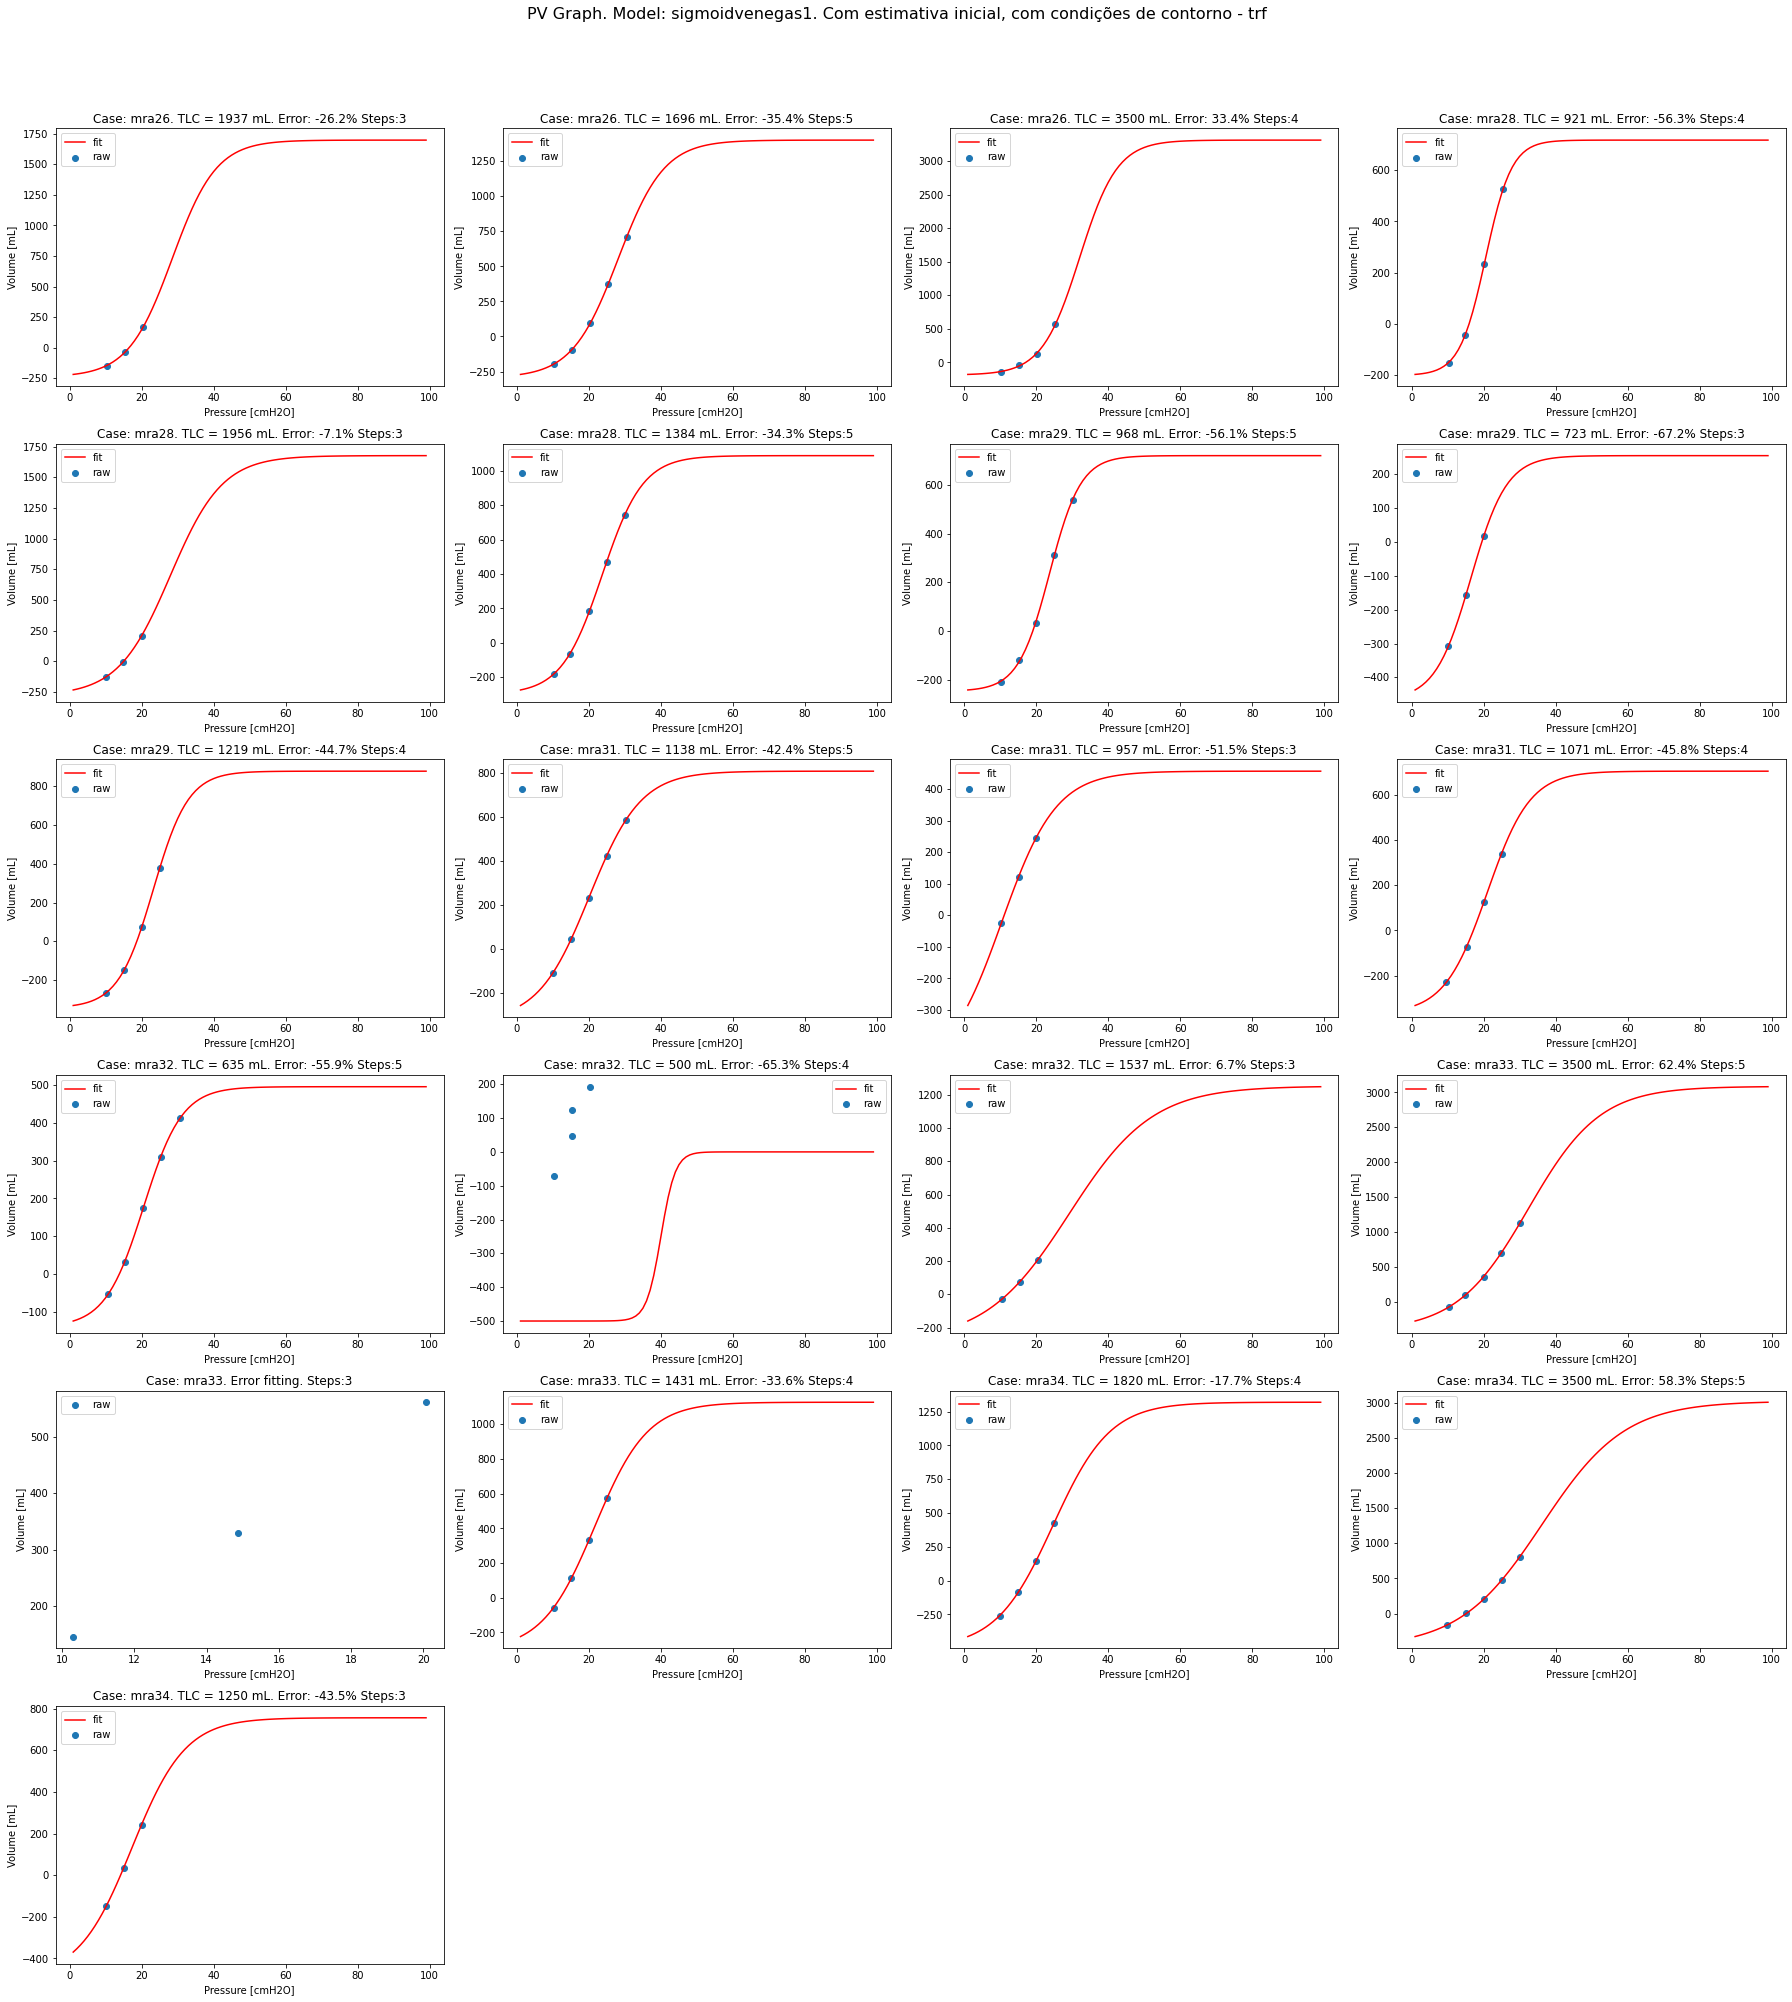

Norma(erro): 204.2. Erro médio: 42.19%. Ajustados: 20.
Testando caso 0: mra26: [ -214.6   922.9    22.0     4.6 ]
Testando caso 1: mra26: [ -295.5  1694.3    28.1     6.4 ]
Testando caso 2: mra26: [ -157.2  3500.0    32.0     4.9 ]
Testando caso 3: mra28: [ -229.5   964.7    20.5     3.9 ]
Testando caso 4: mra28: [ -253.9  1271.5    23.4     6.0 ]
Testando caso 5: mra28: [ -312.3  1409.0    23.6     5.8 ]
Testando caso 6: mra29: [ -227.0   947.9    23.9     4.1 ]
Testando caso 7: mra29: [ -500.0   833.1    17.2     5.9 ]
Testando caso 8: mra29: [ -364.0  1323.0    23.8     5.3 ]
Testando caso 9: mra31: [ -318.8  1148.7    20.5     7.2 ]
Testando caso 10: mra31: [ -500.0   955.7    10.4     7.6 ]
Testando caso 11: mra31: [ -378.8  1090.3    21.0     6.1 ]
Testando caso 12: mra32: [ -152.8   649.8    20.3     5.5 ]
Testando caso 13: mra32: [ -500.0   500.0    40.0     2.0 ]
Testando caso 14: mra32: [ -308.1  1847.2    32.6    12.8 ]
Testando caso 15: mra33: [ -400.3  3500.0    32.6     9

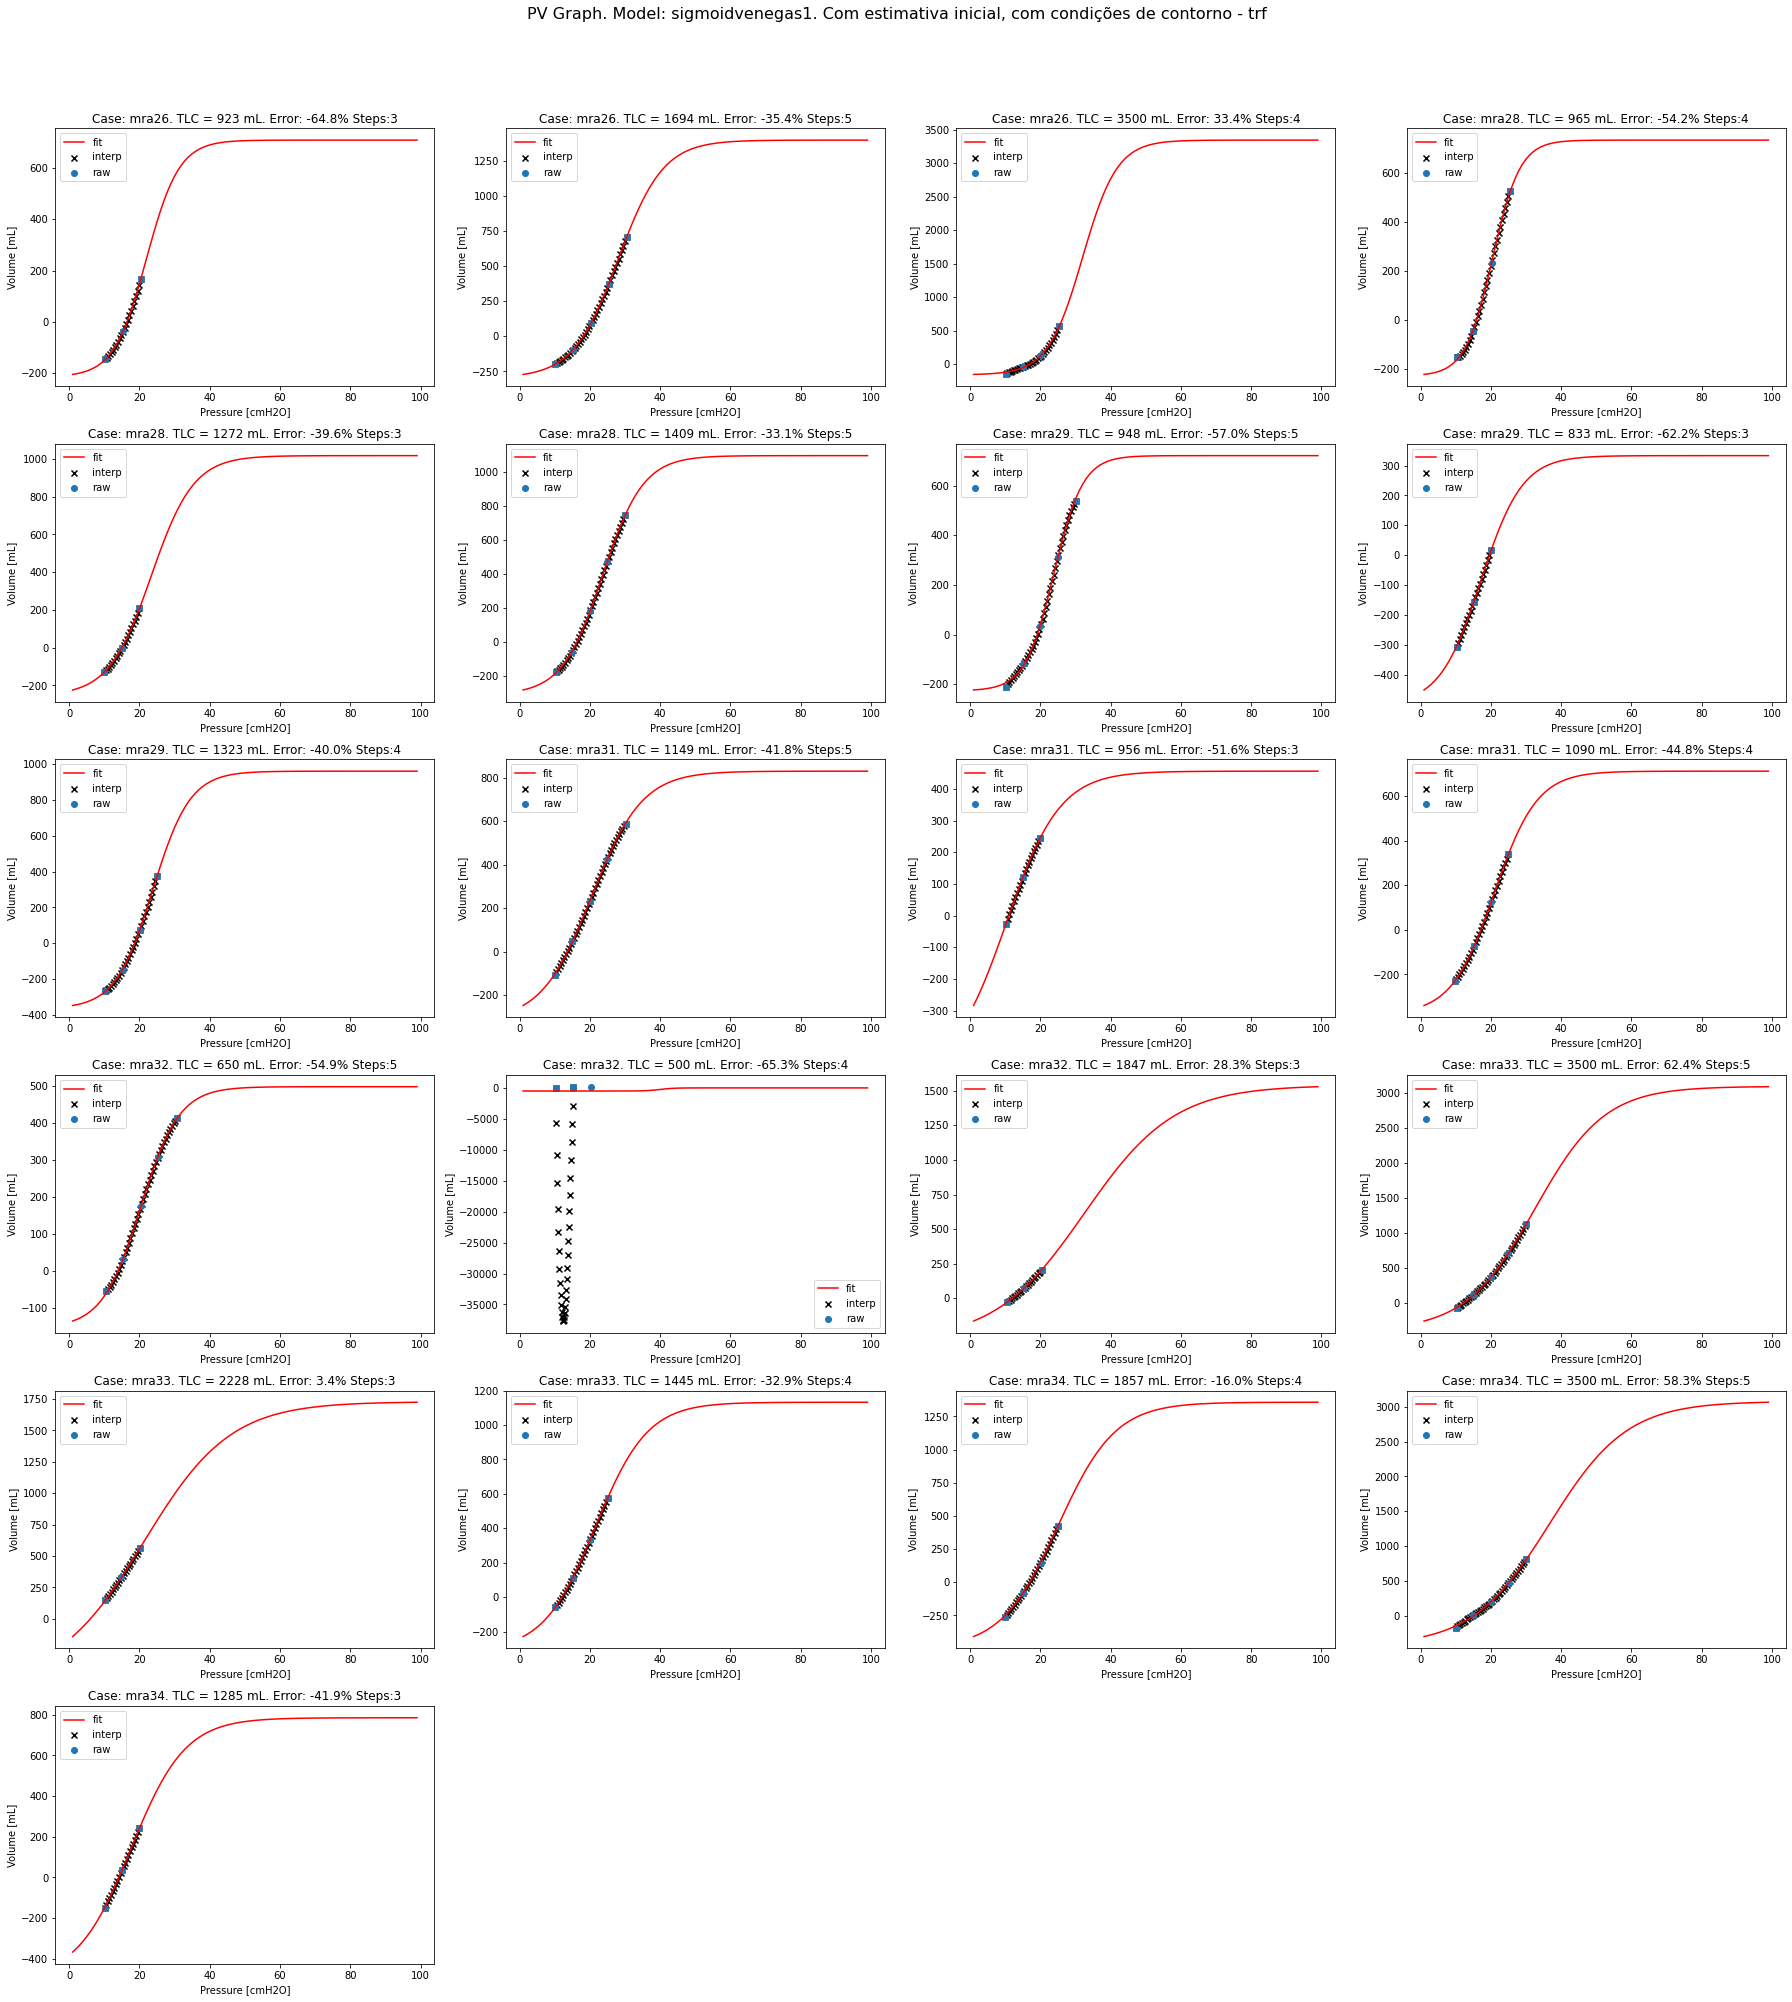

Norma(erro): 214.0. Erro médio: 43.88%. Ajustados: 21.
Testando caso 0: mra26: [ -215.0   922.0    22.0     4.7 ]
Testando caso 1: mra26: [ -295.4  1692.1    28.1     6.4 ]
Testando caso 2: mra26: [ -156.0  3500.0    32.0     4.9 ]
Testando caso 3: mra28: [ -231.2   967.2    20.5     3.9 ]
Testando caso 4: mra28: [ -254.2  1270.8    23.4     6.0 ]
Testando caso 5: mra28: [ -313.4  1411.2    23.6     5.8 ]
Testando caso 6: mra29: [ -226.1   947.9    23.9     4.1 ]
Testando caso 7: mra29: [ -500.0   832.4    17.2     5.9 ]
Testando caso 8: mra29: [ -364.9  1322.8    23.8     5.3 ]
Testando caso 9: mra31: [ -318.6  1150.5    20.6     7.2 ]
Testando caso 10: mra31: [ -500.0   955.8    10.3     7.6 ]
Testando caso 11: mra31: [ -379.7  1091.7    21.0     6.1 ]
Testando caso 12: mra32: [ -154.1   651.6    20.3     5.5 ]
Testando caso 13: mra32: [ -500.0   500.0    40.0     2.0 ]
Testando caso 14: mra32: [ -308.2  1847.0    32.6    12.8 ]
Testando caso 15: mra33: [ -399.5  3500.0    32.6     9

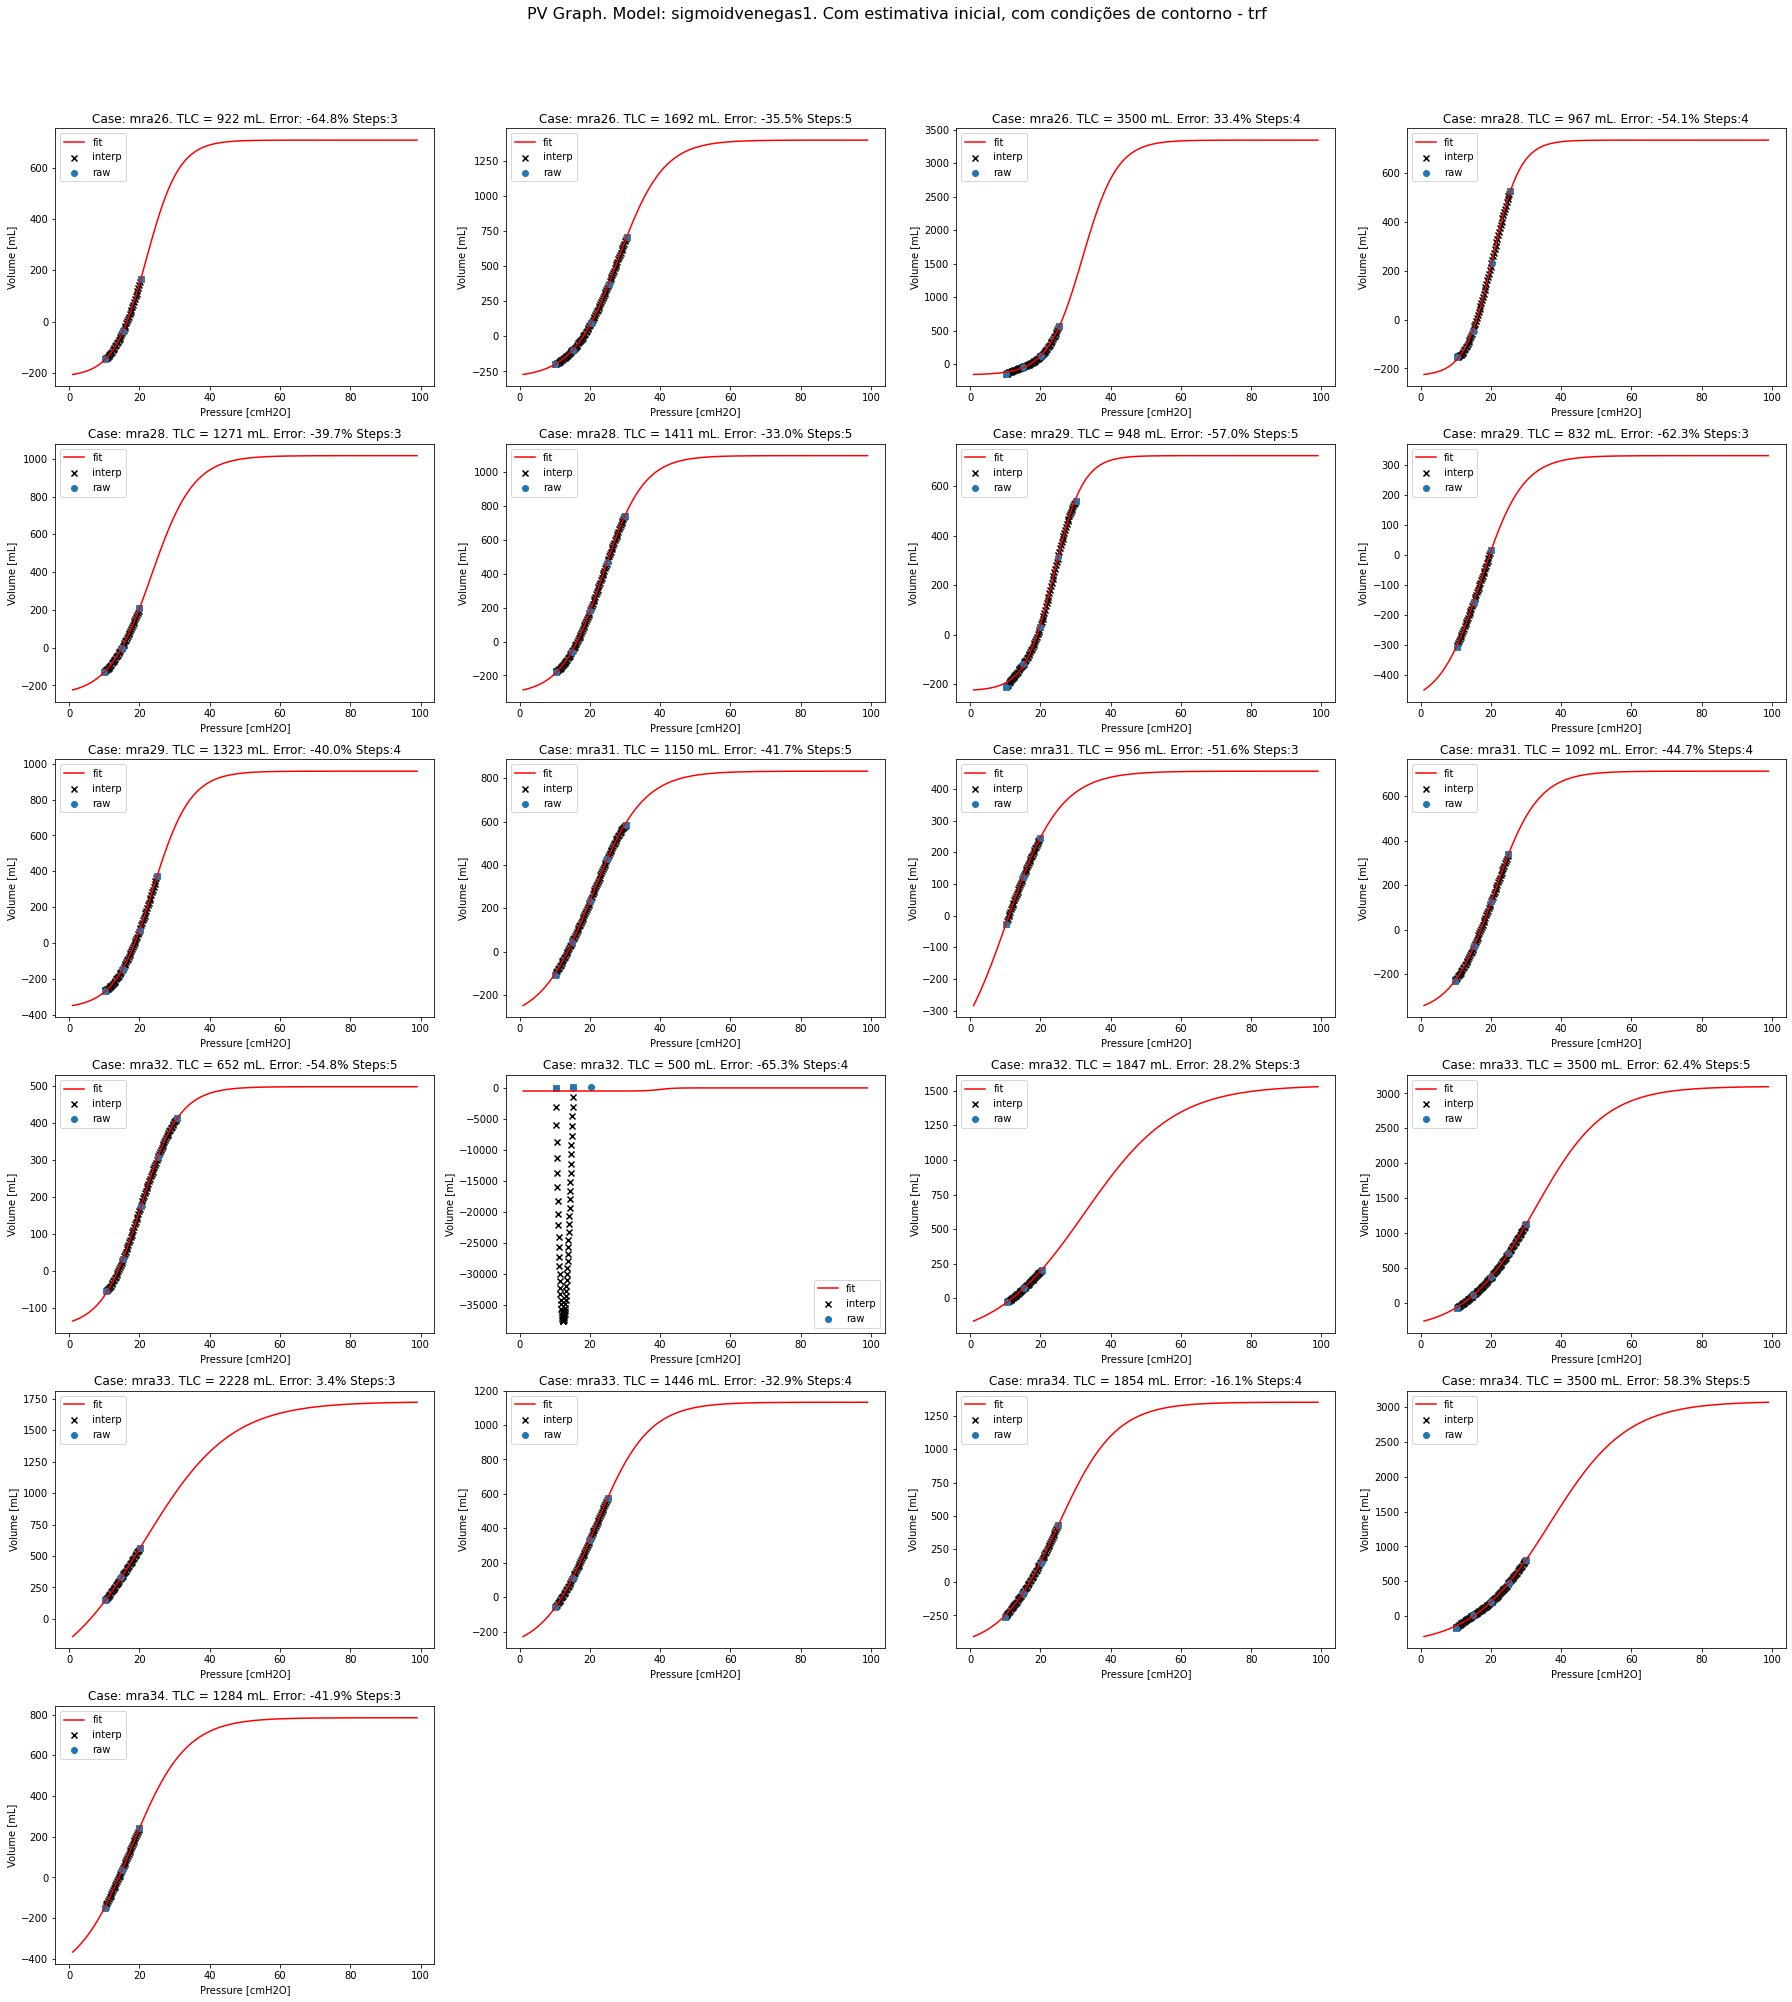

Norma(erro): 213.9. Erro médio: 43.86%. Ajustados: 21.


In [24]:
modelo = m.sigmoidvenegas1
metodo = 'trf'
texto = 'Com estimativa inicial, com condições de contorno - trf'
TLC_index = 1
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =      [  -200, 2000,   25,      5]
meus_bounds = ([  -500, Vmin,    0,      2],
              [   500, Vmax,   40,     40])
for i in interpolacoes:
    _, _, _, df_final = m.testa_modelo(dadosdf, modelo,meu_p0 = meu_p0, metodo=metodo, texto=texto, n_points_interp=i, TLC_index=TLC_index, df_final=df_final, meus_bounds = meus_bounds)
    if i == 0:
        df_resultados = pd.concat([dadosdf], ignore_index=True)
    else:
        df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidpaivaoffset - Com estimativa inicial, com condições de contorno.
#### Método trf

Testando caso 0: mra26: [ 3500.0 0.041 0.146  -251.1 ]
Testando caso 1: mra26: [ 1695.6 0.048 0.156  -294.7 ]
Testando caso 2: mra26: [ 3500.0 0.132 0.191  -188.2 ]
Testando caso 3: mra28: [  921.0 0.320 0.276  -202.9 ]
Testando caso 4: mra28: [ 2978.2 0.019 0.122  -298.4 ]
Testando caso 5: mra28: [ 1384.2 0.048 0.177  -297.5 ]
Testando caso 6: mra29: [  968.3 0.241 0.230  -247.6 ]
Testando caso 7: mra29: [  808.4 0.025 0.178  -498.6 ]
Testando caso 8: mra29: [ 1219.1 0.095 0.205  -342.9 ]
Testando caso 9: mra31: [ 1137.7 0.015 0.140  -327.8 ]
Testando caso 10: mra31: [  915.3 0.005 0.138  -467.6 ]
Testando caso 11: mra31: [ 1070.9 0.032 0.168  -367.2 ]
Testando caso 12: mra32: [  634.8 0.074 0.187  -139.8 ]
Testando caso 13: mra32: [  500.0 1.000 0.000  -500.0 ]
Testando caso 14: mra32: [ 1123.0 0.012 0.106  -239.8 ]
Testando caso 15: mra33: [ 3499.4 0.008 0.101  -409.1 ]
Testando caso 16: mra33: [ 1632.9 0.005 0.109  -326.3 ]
Testando caso 17: mra33: [ 1431.4 0.013 0.137  -303.9 ]
Te

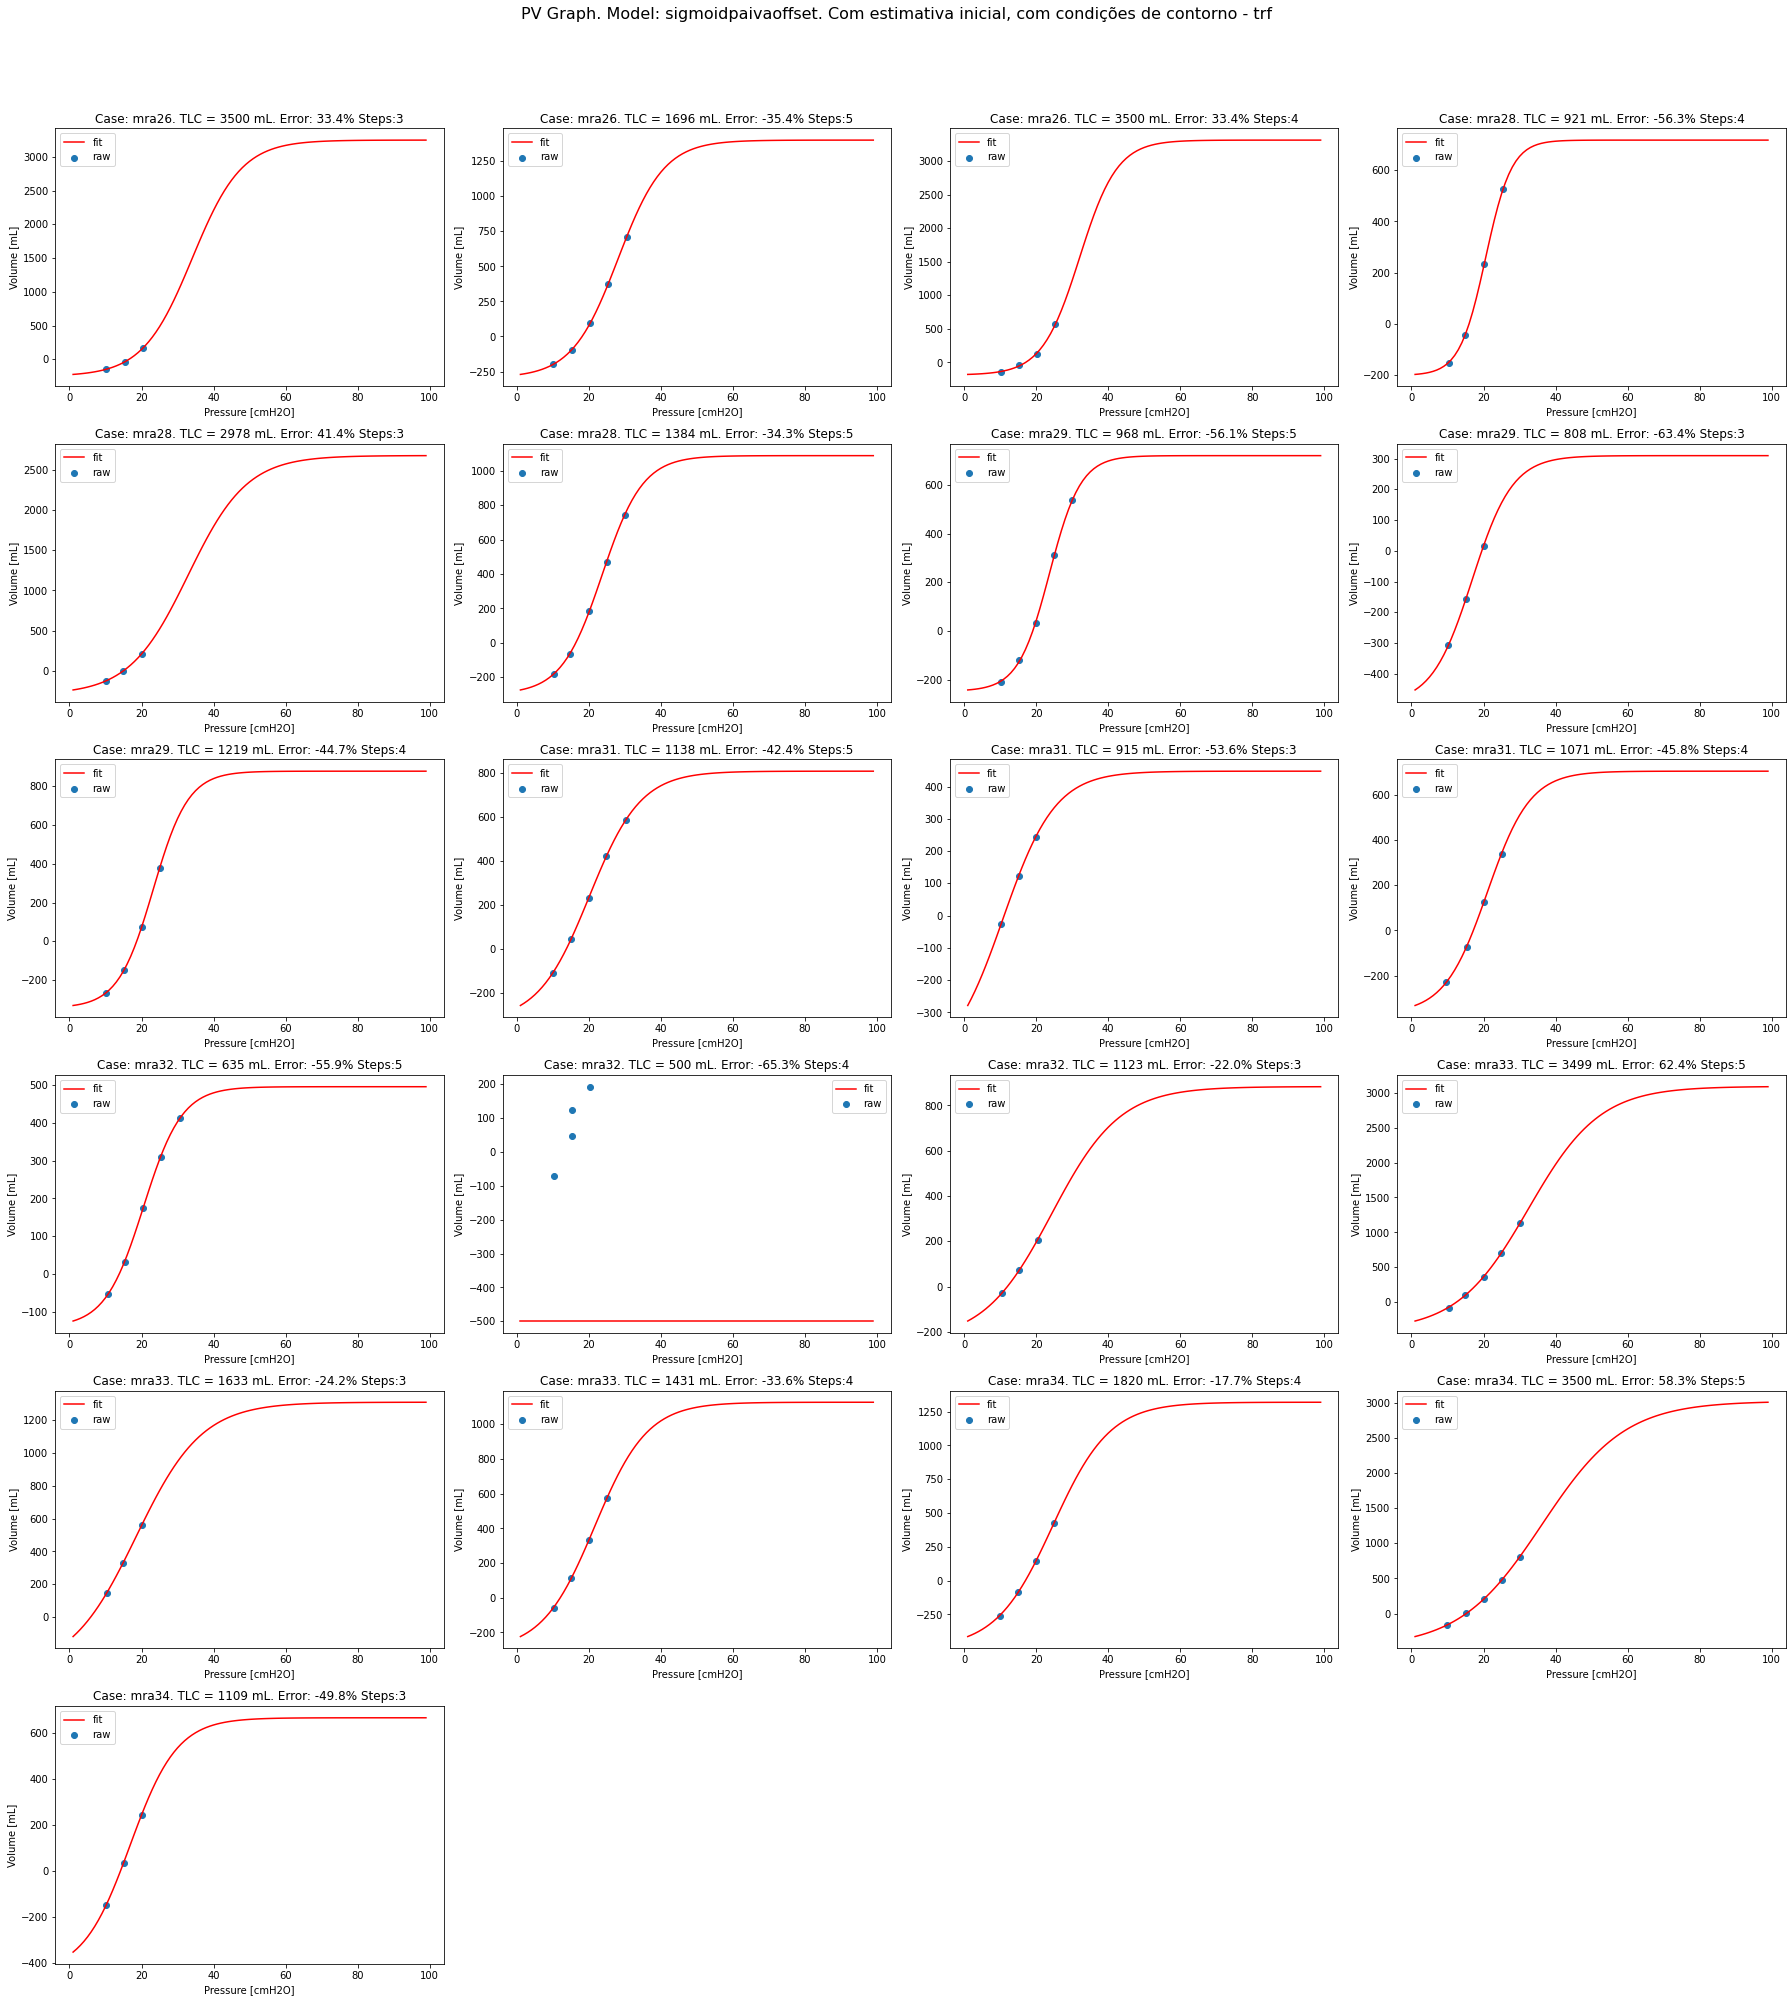

Norma(erro): 212.5. Erro médio: 44.26%. Ajustados: 21.
Testando caso 0: mra26: [  922.9 0.124 0.215  -214.6 ]
Testando caso 1: mra26: [ 1694.3 0.047 0.156  -295.5 ]
Testando caso 2: mra26: [ 3500.0 0.190 0.203  -157.2 ]
Testando caso 3: mra28: [  964.7 0.199 0.256  -229.5 ]
Testando caso 4: mra28: [ 1271.5 0.038 0.166  -253.9 ]
Testando caso 5: mra28: [ 1409.0 0.042 0.173  -312.3 ]
Testando caso 6: mra29: [  947.9 0.346 0.242  -227.0 ]
Testando caso 7: mra29: [  833.1 0.022 0.170  -500.0 ]
Testando caso 8: mra29: [ 1323.0 0.066 0.188  -364.0 ]
Testando caso 9: mra31: [ 1148.7 0.015 0.139  -318.8 ]
Testando caso 10: mra31: [  955.7 0.004 0.131  -500.0 ]
Testando caso 11: mra31: [ 1090.3 0.029 0.164  -378.8 ]
Testando caso 12: mra32: [  649.8 0.063 0.182  -152.8 ]
Testando caso 13: mra32: [  500.0 1.000 0.000  -500.0 ]
Testando caso 14: mra32: [ 1847.2 0.007 0.078  -308.1 ]
Testando caso 15: mra33: [ 3499.4 0.008 0.101  -397.5 ]
Testando caso 16: mra33: [ 2228.1 0.003 0.081  -500.0 ]
Tes

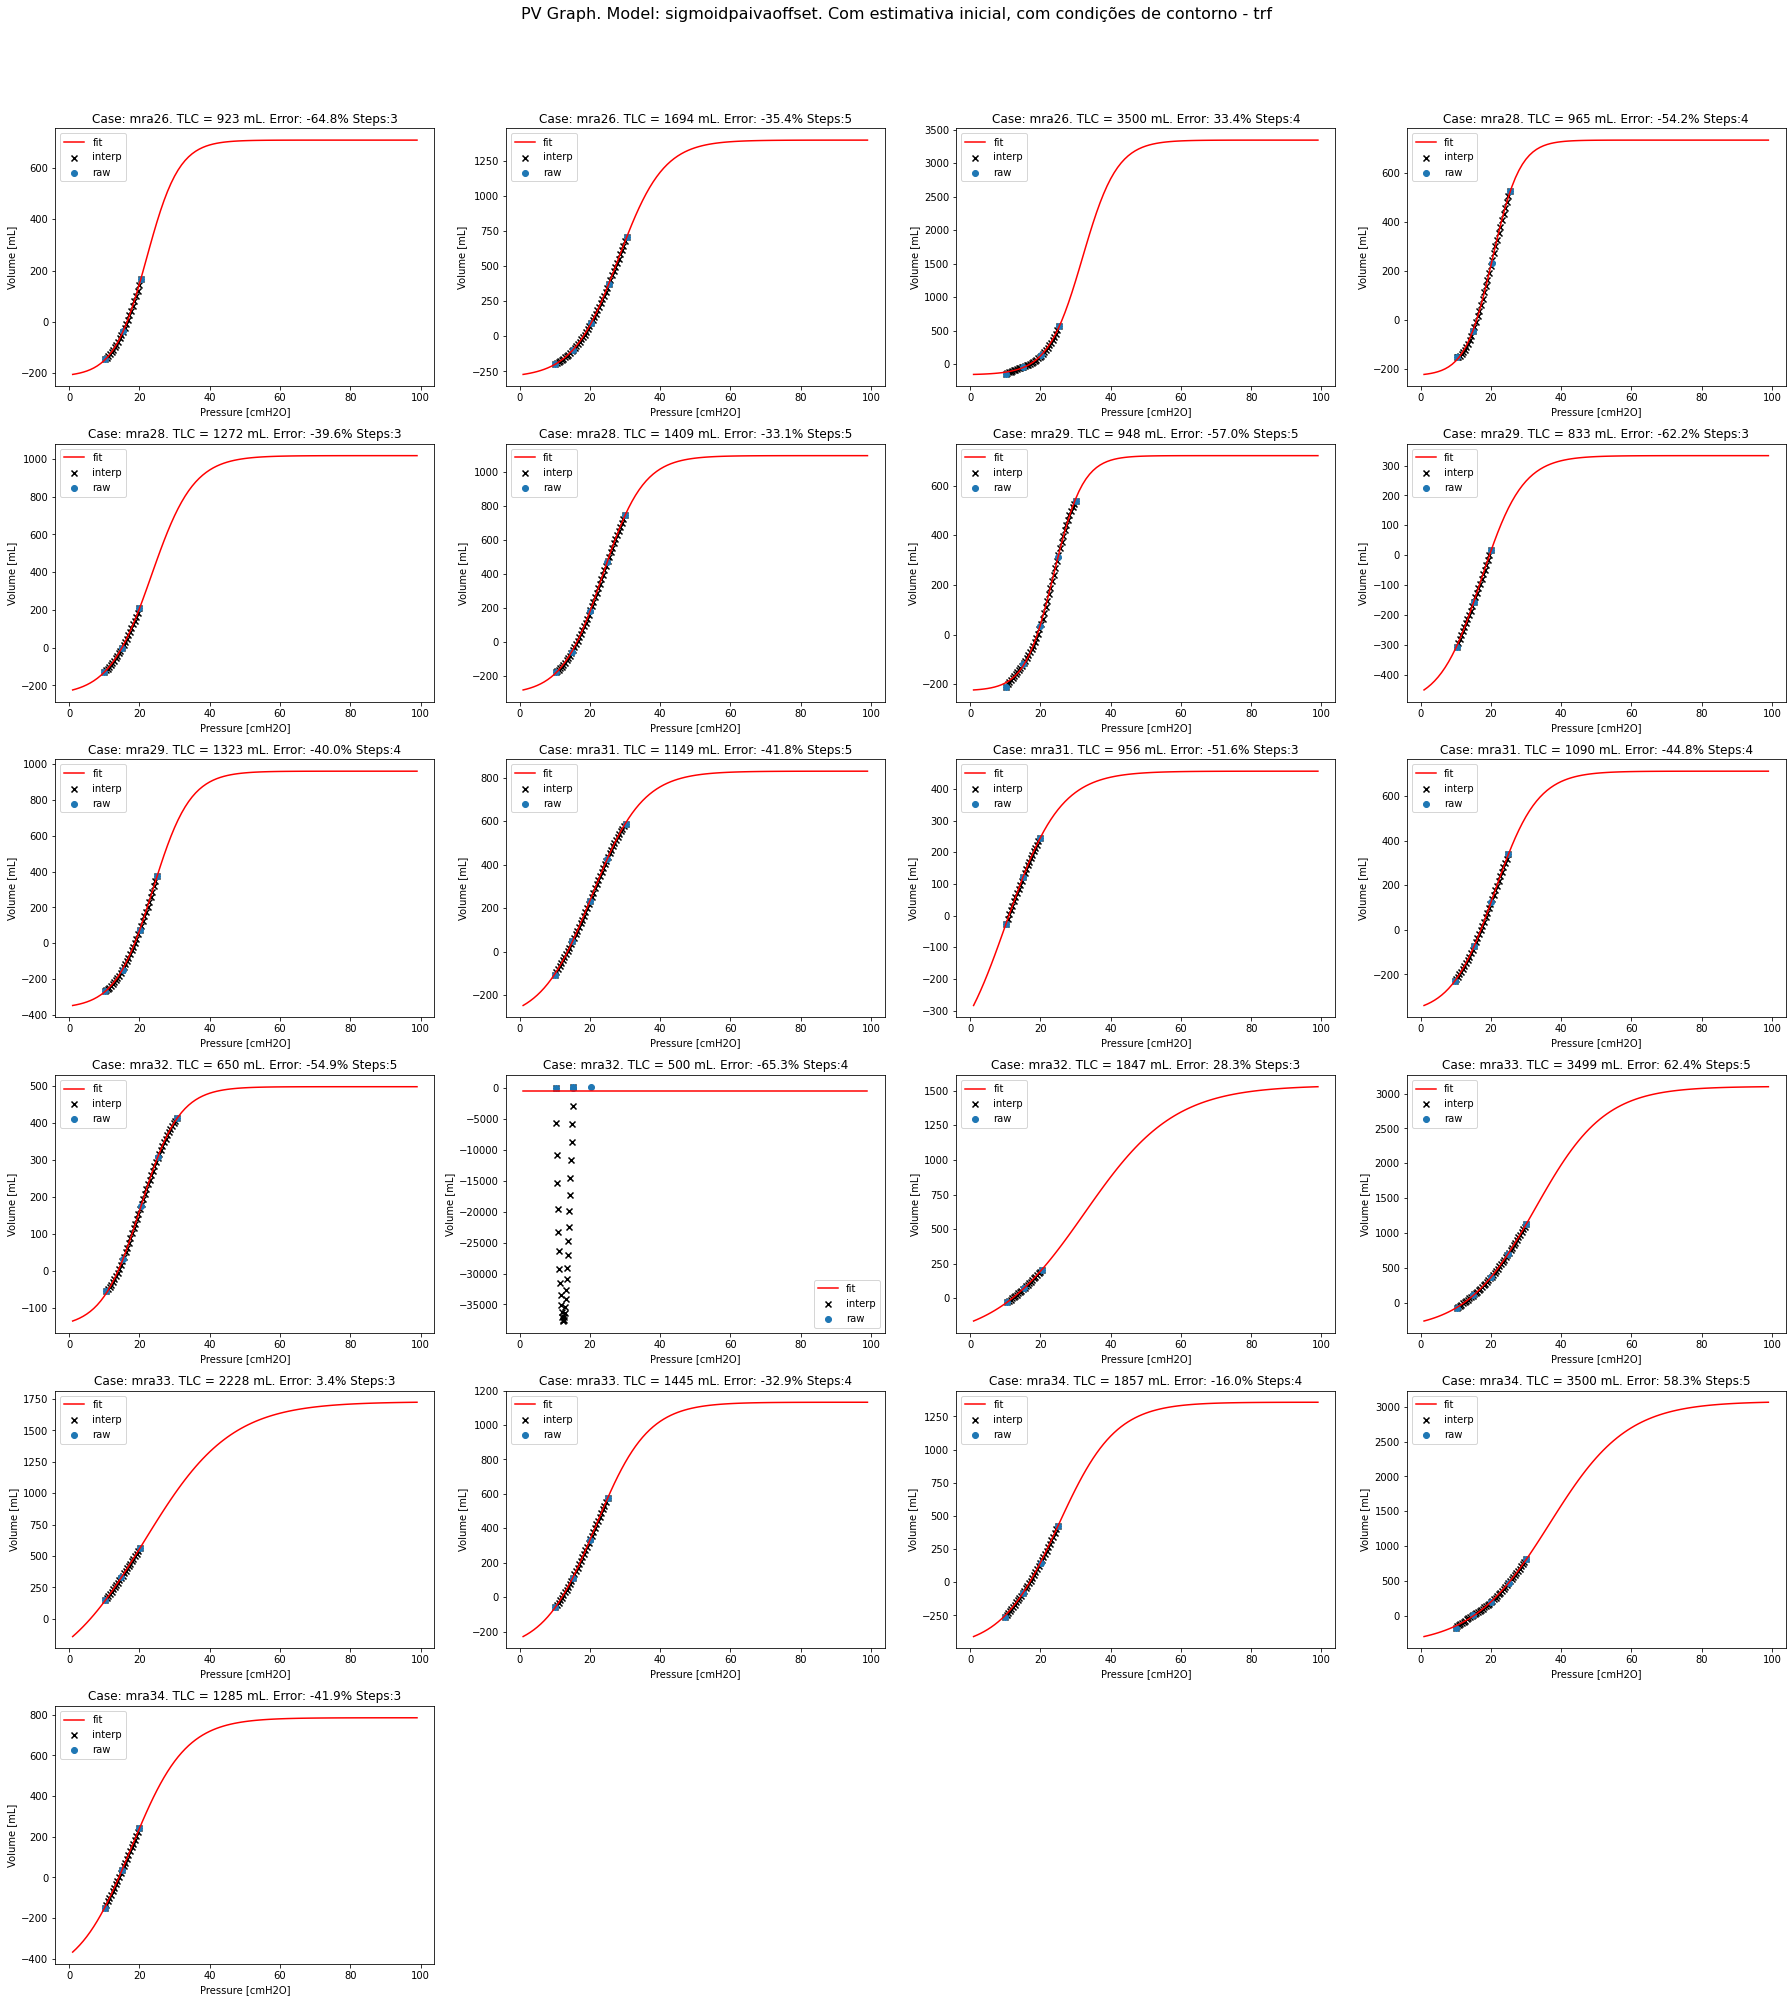

Norma(erro): 214.0. Erro médio: 43.88%. Ajustados: 21.
Testando caso 0: mra26: [  922.0 0.123 0.215  -215.0 ]
Testando caso 1: mra26: [ 1692.1 0.047 0.156  -295.4 ]
Testando caso 2: mra26: [ 3500.0 0.193 0.203  -156.0 ]
Testando caso 3: mra28: [  967.2 0.194 0.255  -231.2 ]
Testando caso 4: mra28: [ 1270.8 0.038 0.166  -254.2 ]
Testando caso 5: mra28: [ 1411.2 0.042 0.172  -313.4 ]
Testando caso 6: mra29: [  947.9 0.350 0.243  -226.1 ]
Testando caso 7: mra29: [  832.4 0.022 0.170  -500.0 ]
Testando caso 8: mra29: [ 1322.8 0.066 0.188  -364.9 ]
Testando caso 9: mra31: [ 1150.5 0.015 0.139  -318.6 ]
Testando caso 10: mra31: [  955.8 0.004 0.131  -500.0 ]
Testando caso 11: mra31: [ 1091.7 0.028 0.163  -379.7 ]
Testando caso 12: mra32: [  651.6 0.062 0.182  -154.1 ]
Testando caso 13: mra32: [  500.0 1.000 0.000  -500.0 ]
Testando caso 14: mra32: [ 1847.0 0.007 0.078  -308.2 ]
Testando caso 15: mra33: [ 3499.3 0.008 0.101  -398.1 ]
Testando caso 16: mra33: [ 2227.5 0.003 0.081  -500.0 ]
Tes

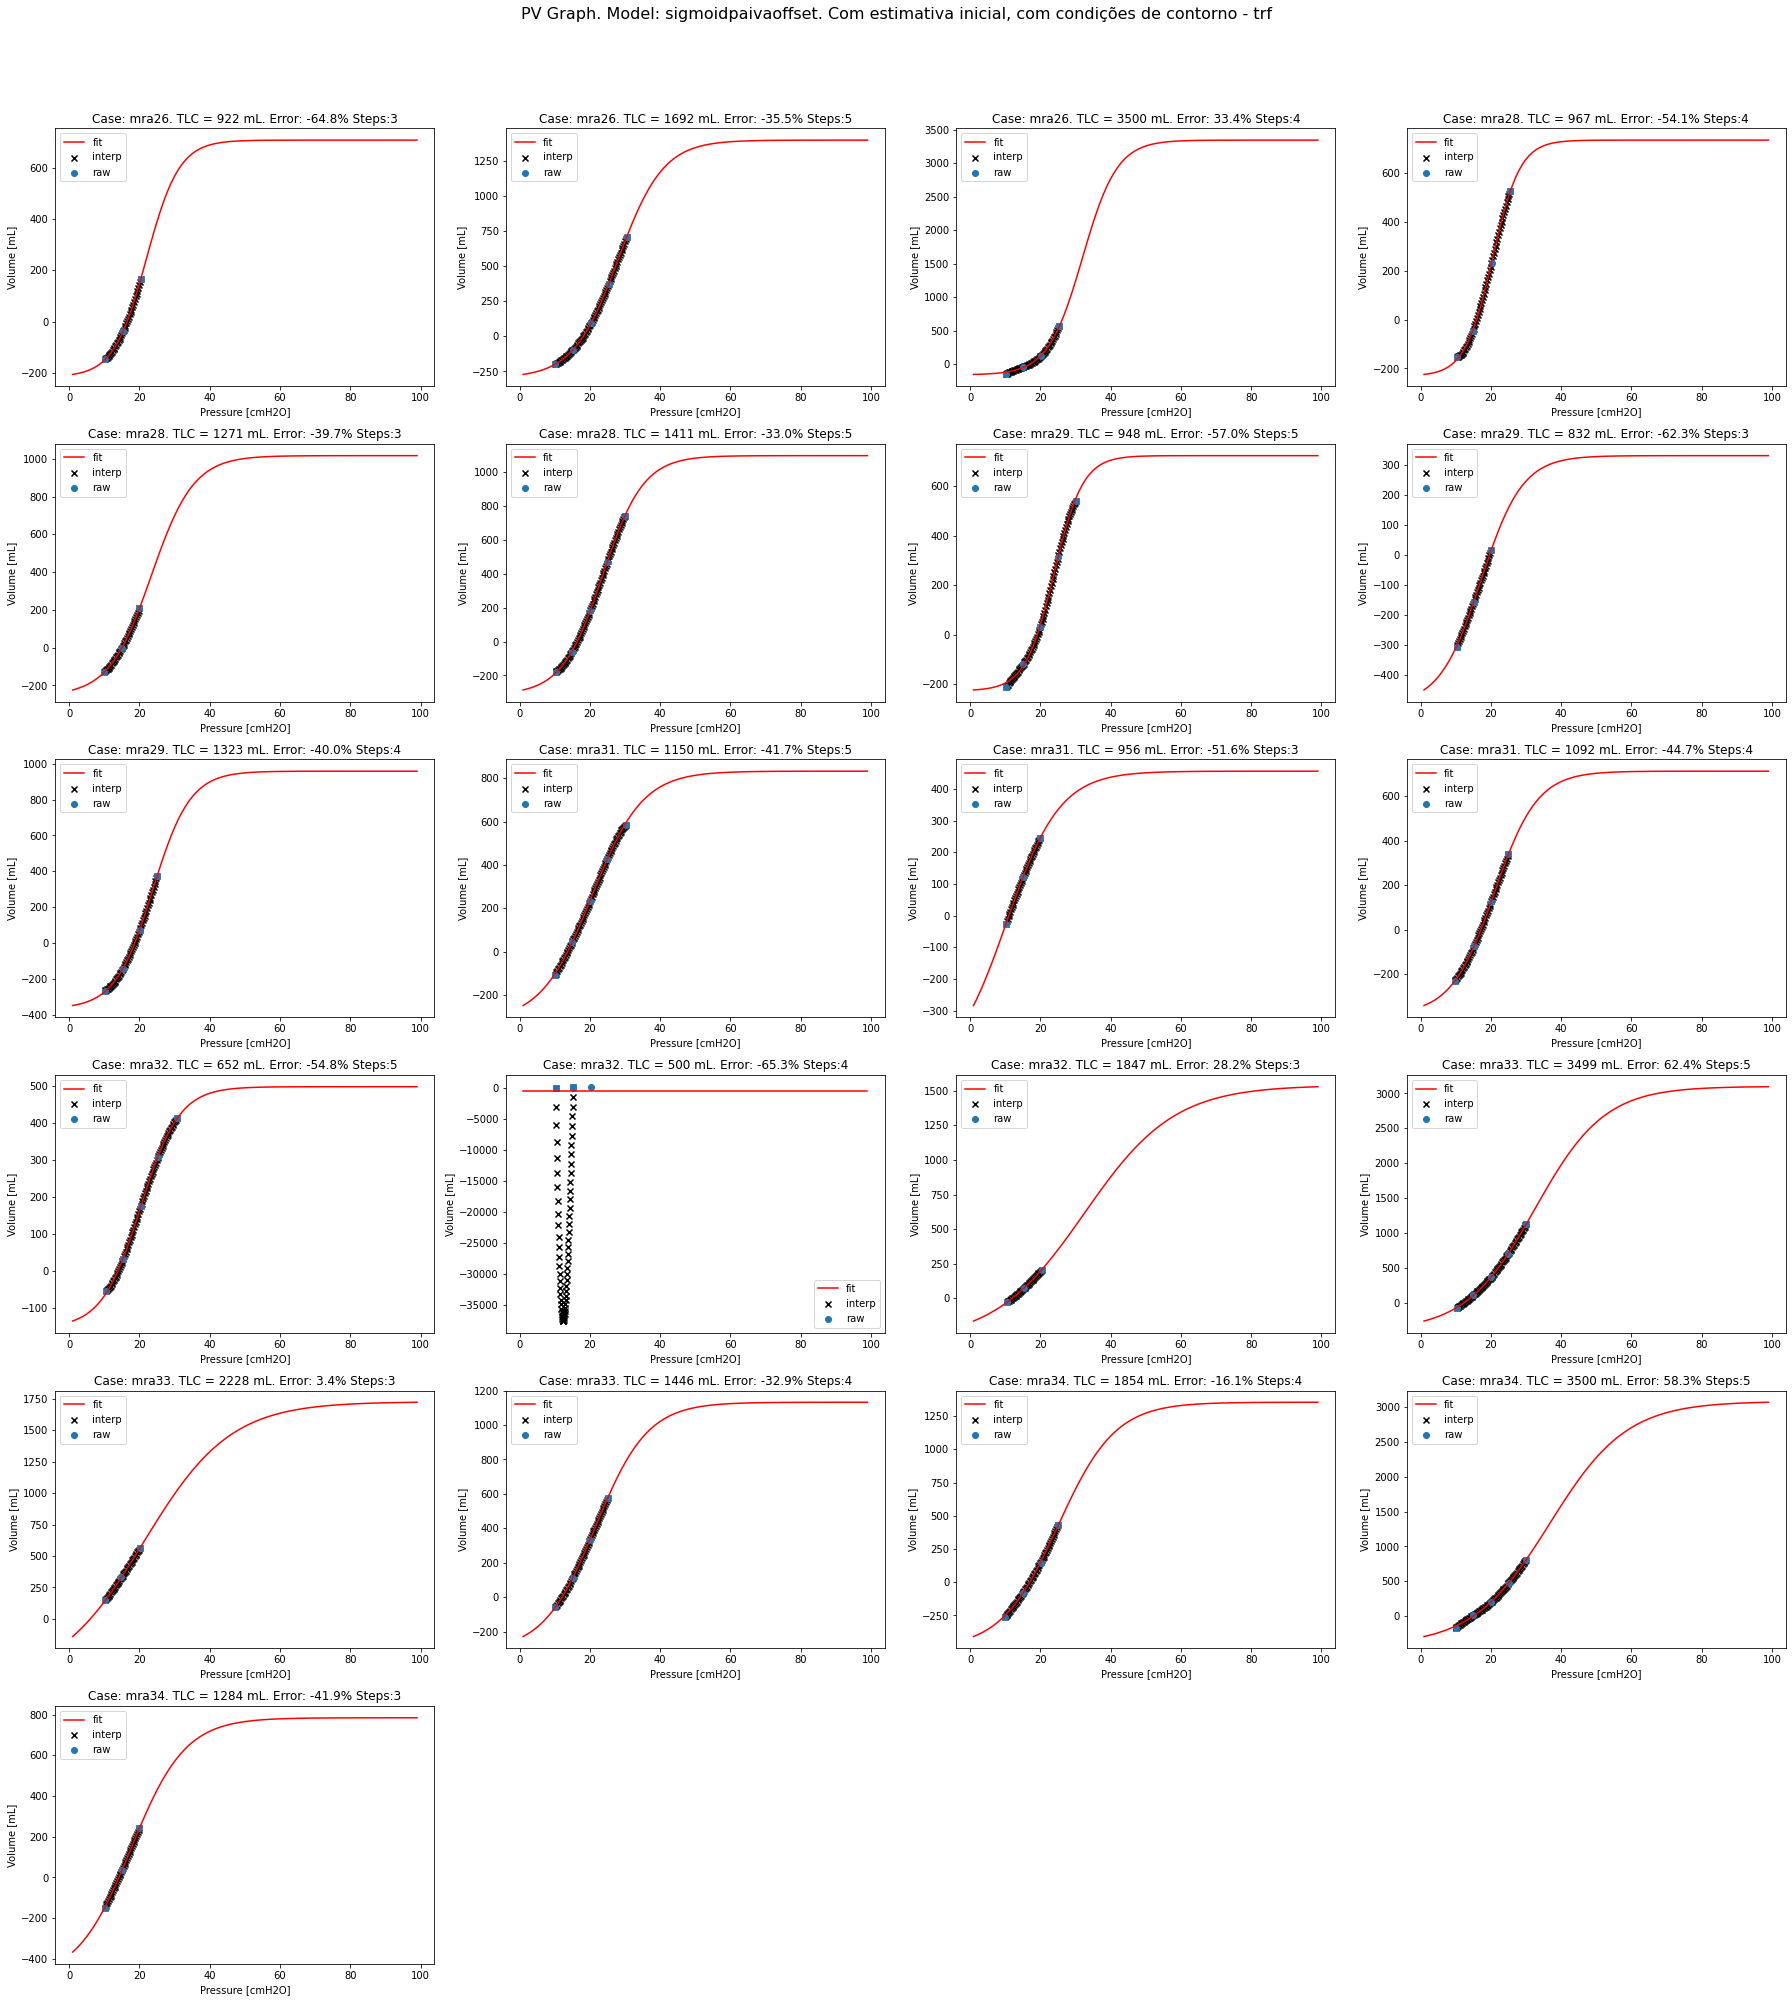

Norma(erro): 213.9. Erro médio: 43.86%. Ajustados: 21.


In [25]:
modelo = m.sigmoidpaivaoffset
metodo = 'trf'
texto = 'Com estimativa inicial, com condições de contorno - trf'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =      [  2000,   0.01, 0.05,   -200]
meus_bounds = ([  Vmin,      0,    0,   -500],
              [  Vmax,      1,   40,    500])
for i in interpolacoes:
    _, _, _, df_final = m.testa_modelo(dadosdf, modelo,meu_p0 = meu_p0, metodo=metodo, texto=texto, n_points_interp=i, TLC_index=TLC_index, df_final=df_final, meus_bounds = meus_bounds)
    df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidvenegas2offset - Com estimativa inicial, com condições de contorno.
#### Método trf

Testando caso 0: mra26: [ 1820.4   105.1    16.1    27.9     6.0  -237.8 ]
Testando caso 1: mra26: [ 1695.6  -136.4     4.4    28.1     6.4  -294.7 ]
Testando caso 2: mra26: [ 3500.0  -644.3   255.9    32.1     5.2  -188.2 ]
Testando caso 3: mra28: [  921.0   109.4   282.9    20.6     3.6  -202.9 ]
Testando caso 4: mra28: [ 1667.0   209.1   324.8    26.2     6.8  -270.7 ]
Testando caso 5: mra28: [ 1384.2  -353.6    37.1    23.7     5.6  -297.5 ]
Testando caso 6: mra29: [  968.3   195.2    10.9    23.7     4.3  -247.6 ]
Testando caso 7: mra29: [ 1716.1    -9.9     2.0    22.3    11.7  -757.1 ]
Testando caso 8: mra29: [ 1219.1  -523.0    75.7    23.2     4.9  -342.9 ]
Testando caso 9: mra31: [ 1137.7 16062.6    57.0    20.1     7.1  -327.8 ]
Testando caso 10: mra31: [ 1725.7 0.791 -0.175     6.3    12.8 -1019.8 ]
Testando caso 11: mra31: [ 1070.9   372.6     6.4    21.0     6.0  -367.2 ]
	Caso 12 (mra32) deu erro... Steps:5
Testando caso 13: mra32: [  590.5 27886.5 -0.094 0.000    -6.8 -

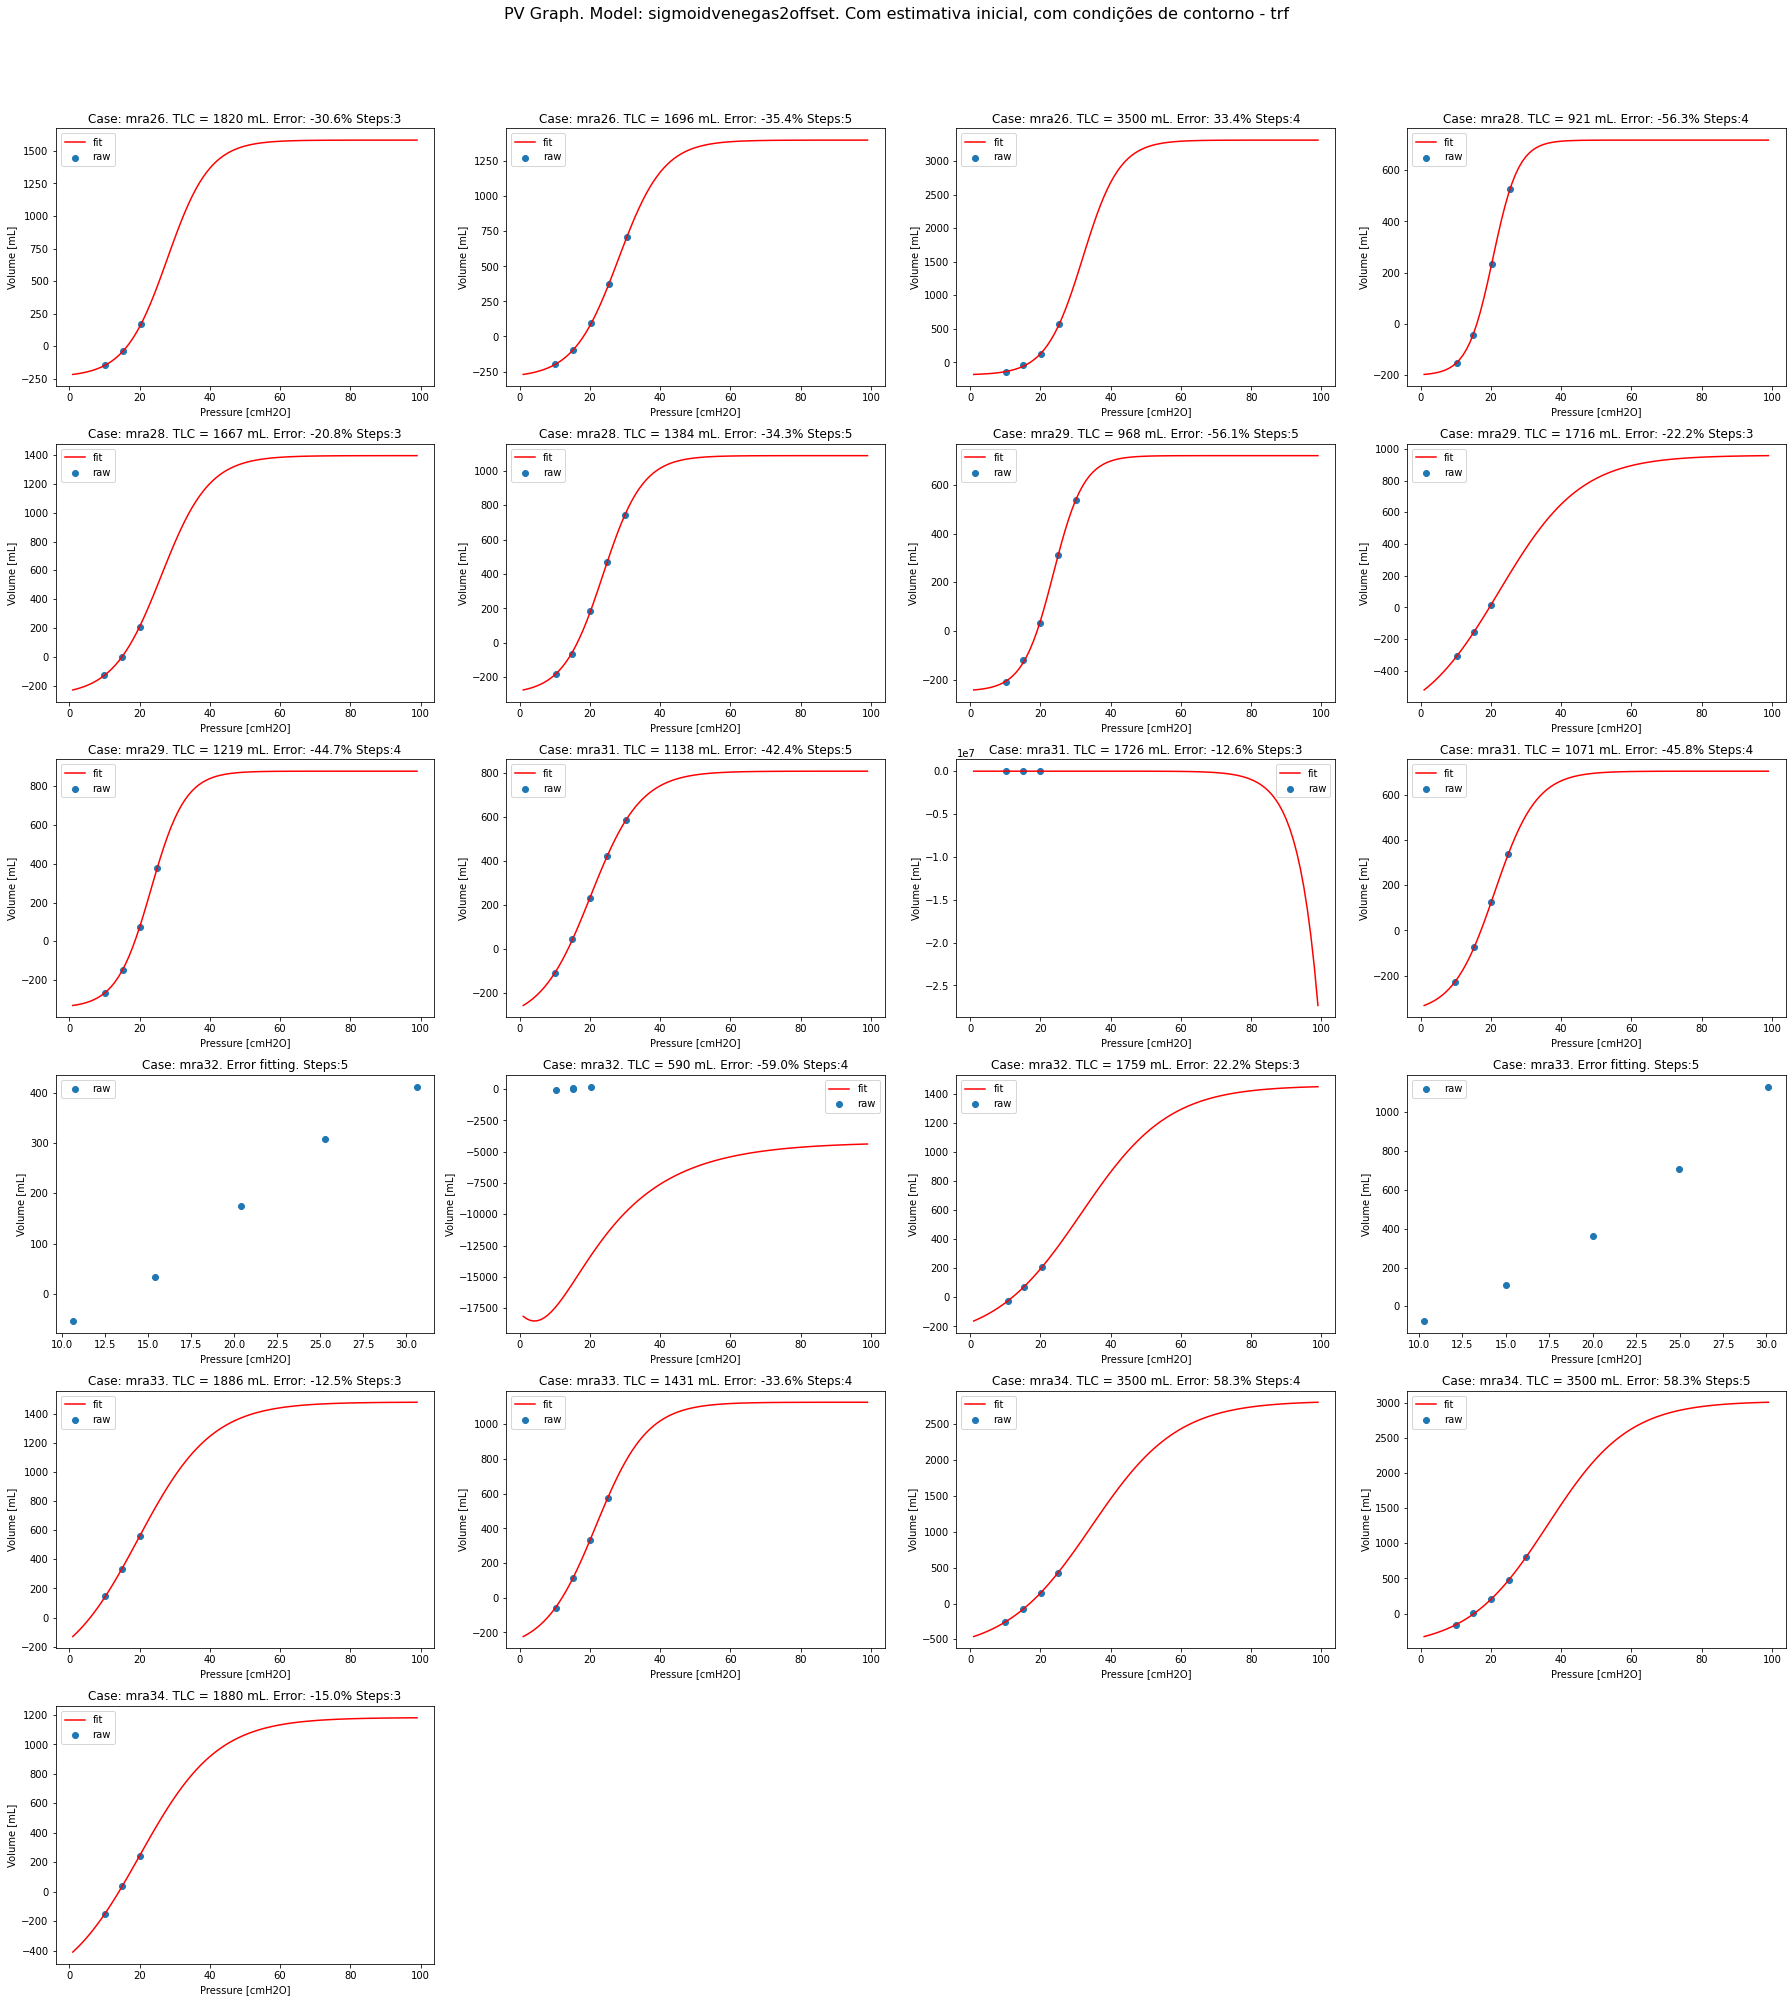

Norma(erro): 173.3. Erro médio: 36.49%. Ajustados: 19.
Testando caso 0: mra26: [  922.9  -199.2   139.2    22.0     4.6  -214.6 ]
	Caso 1 (mra26) deu erro... Steps:5
Testando caso 2: mra26: [ 3500.0  4530.9  3143.7    32.0     4.9  -157.2 ]
	Caso 3 (mra28) deu erro... Steps:4
Testando caso 4: mra28: [ 1271.5    -7.7    10.5    23.4     6.0  -253.9 ]
Testando caso 5: mra28: [ 1409.0   165.9    81.3    23.6     5.8  -312.3 ]
Testando caso 6: mra29: [  947.9    74.0   256.7    23.9     4.1  -227.0 ]
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
Testando caso 9: mra31: [ 3499.1     6.1 -0.151    36.6    13.6  -538.5 ]
	Caso 10 (mra31) deu erro... Steps:3
	Caso 11 (mra31) deu erro... Steps:4
	Caso 12 (mra32) deu erro... Steps:5
Testando caso 13: mra32: [  500.0 13324.8 -0.032    10.7 0.098 -5000.0 ]
	Caso 14 (mra32) deu erro... Steps:3
Testando caso 15: mra33: [ 3500.0  2016.5    53.8    32.6     9.9  -400.3 ]
Testando caso 16: mra33: [ 3500.0  1264.7   120.9    28

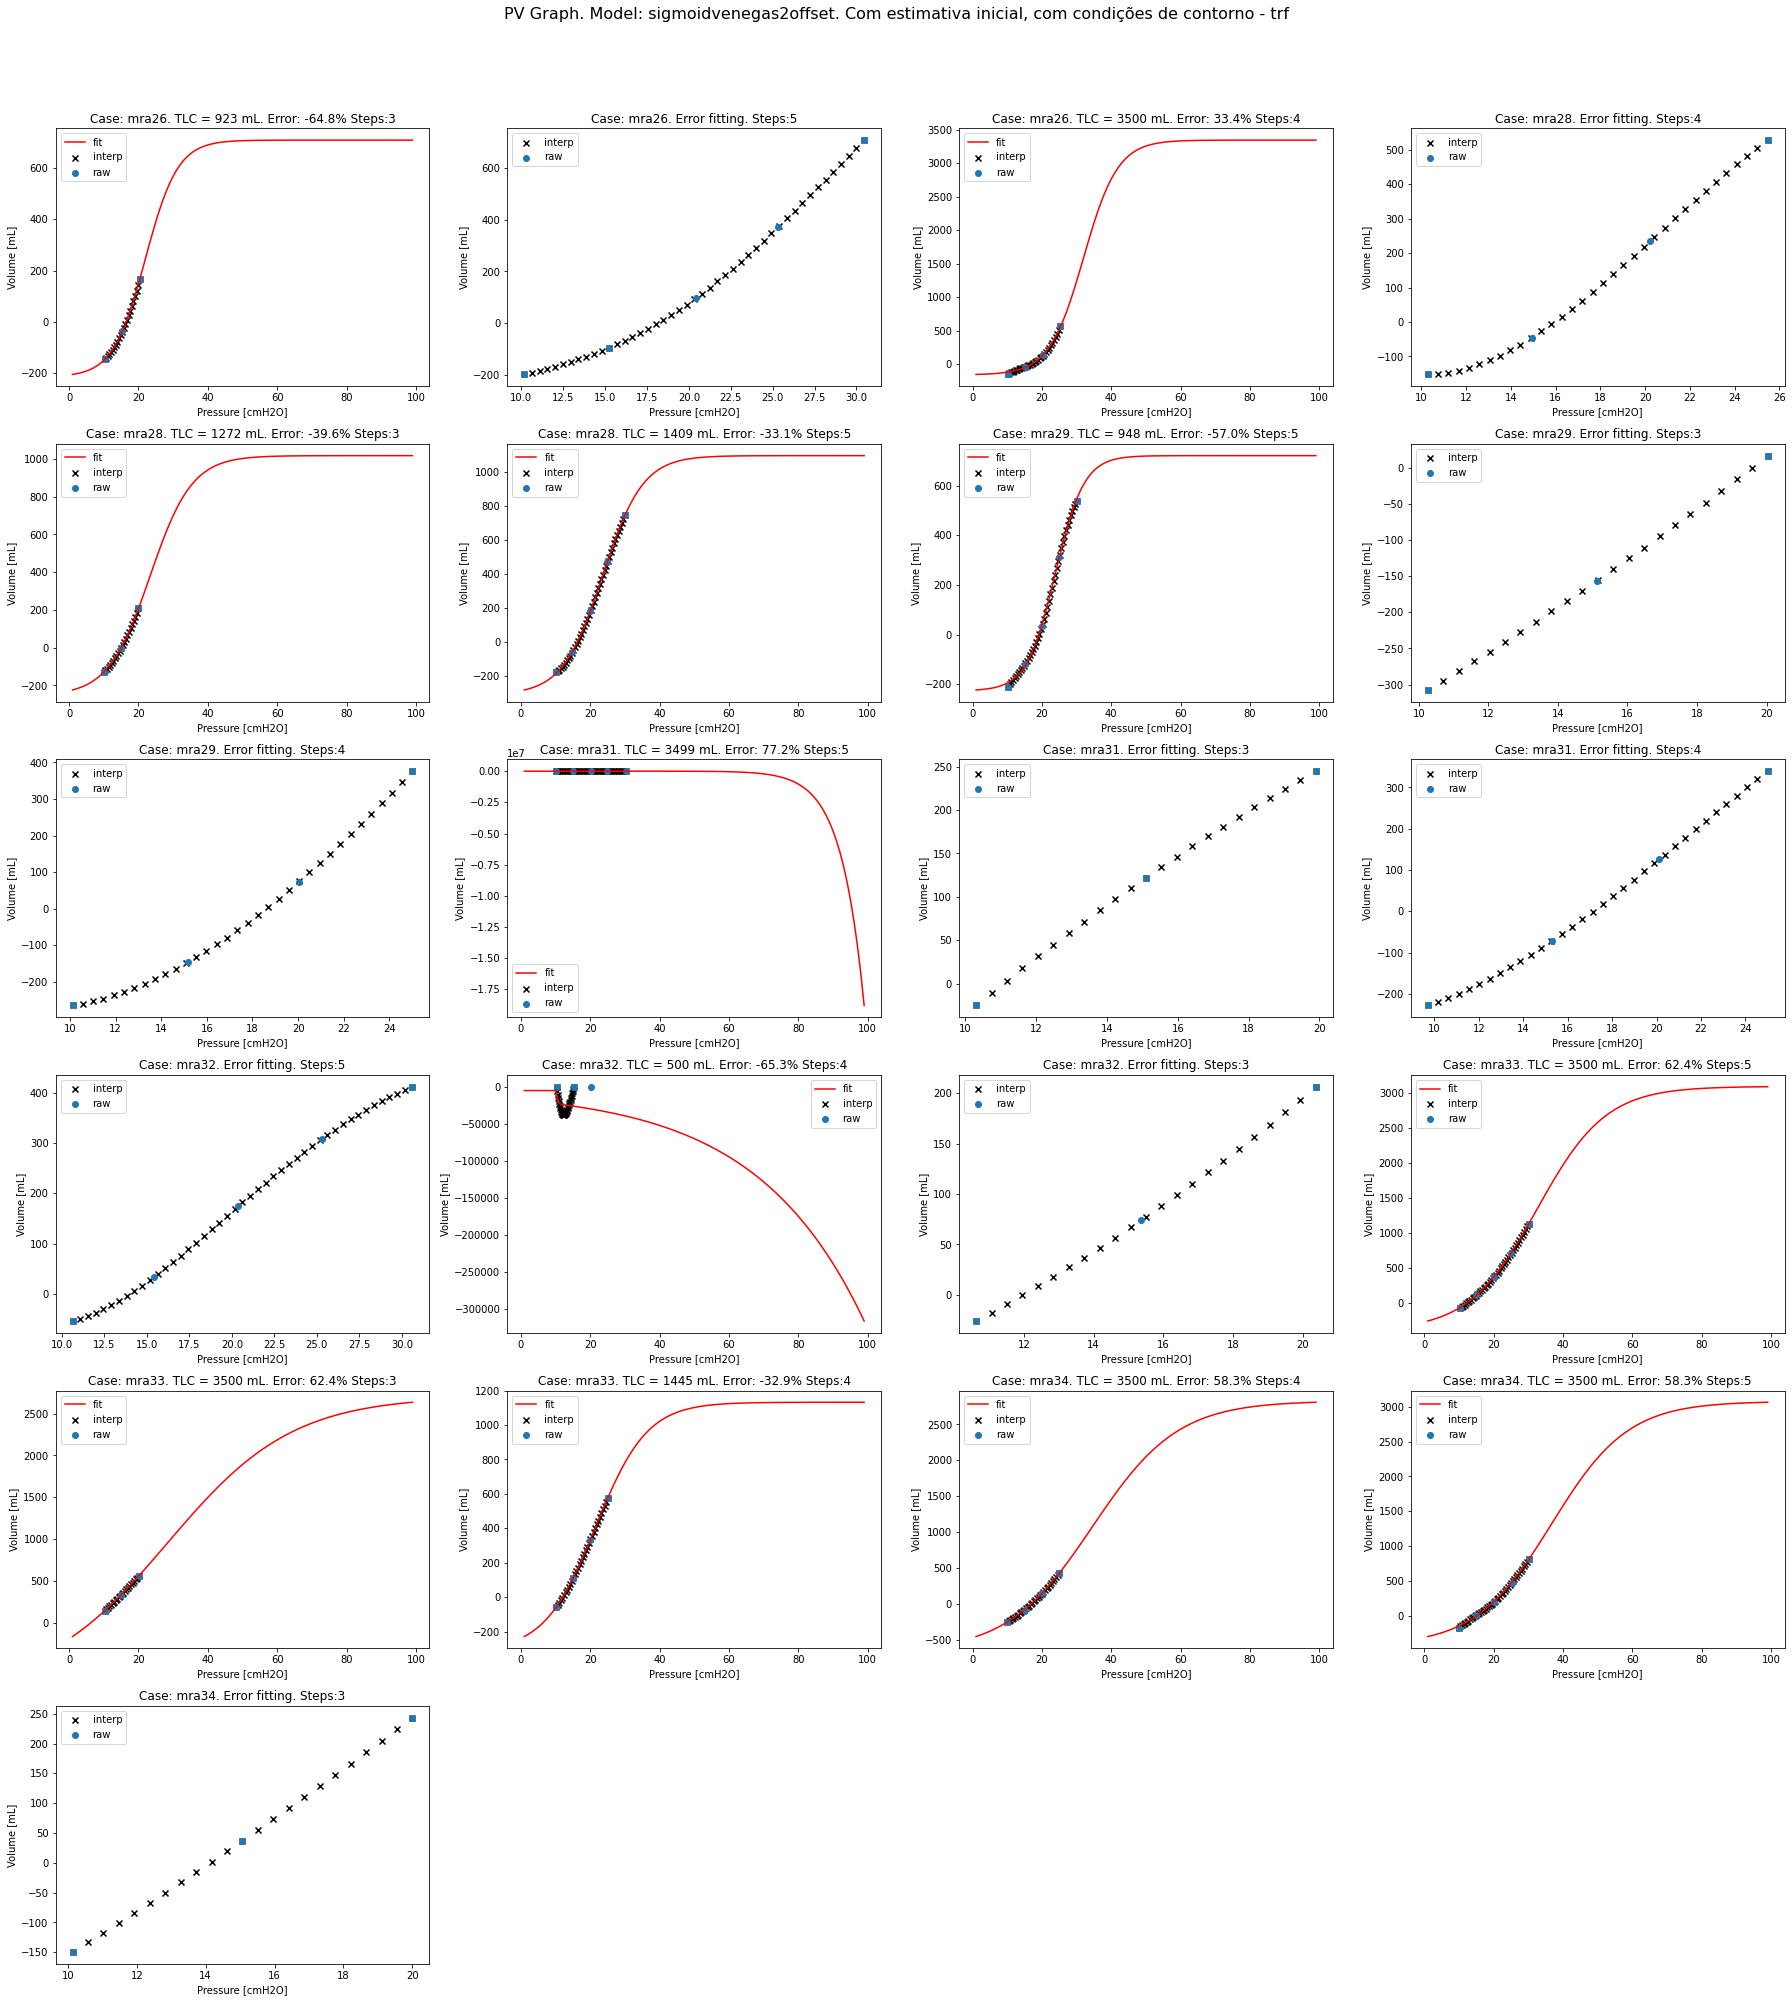

Norma(erro): 192.7. Erro médio: 53.74%. Ajustados: 12.
Testando caso 0: mra26: [  922.0  -381.0    69.2    22.0     4.7  -215.0 ]
Testando caso 1: mra26: [ 1692.1   -16.8     4.9    28.1     6.4  -295.4 ]
Testando caso 2: mra26: [ 3500.0   -79.3    31.8    32.0     4.9  -156.0 ]
Testando caso 3: mra28: [  967.2   -27.4    74.4    20.5     3.9  -231.2 ]
	Caso 4 (mra28) deu erro... Steps:3
Testando caso 5: mra28: [ 1411.2   -18.9     1.9    23.6     5.8  -313.4 ]
Testando caso 6: mra29: [  947.9     5.7    11.9    23.9     4.1  -226.1 ]
	Caso 7 (mra29) deu erro... Steps:3
Testando caso 8: mra29: [ 1322.8  3122.9  1807.9    23.8     5.3  -364.9 ]
Testando caso 9: mra31: [ 3500.0     5.8 -0.153    36.6    13.6  -538.7 ]
	Caso 10 (mra31) deu erro... Steps:3
	Caso 11 (mra31) deu erro... Steps:4
Testando caso 12: mra32: [  651.6    65.4     3.5    20.3     5.5  -154.1 ]
Testando caso 13: mra32: [ 3357.5 1871257.5 0.295    11.2 0.455  4997.9 ]
	Caso 14 (mra32) deu erro... Steps:3
Testando caso

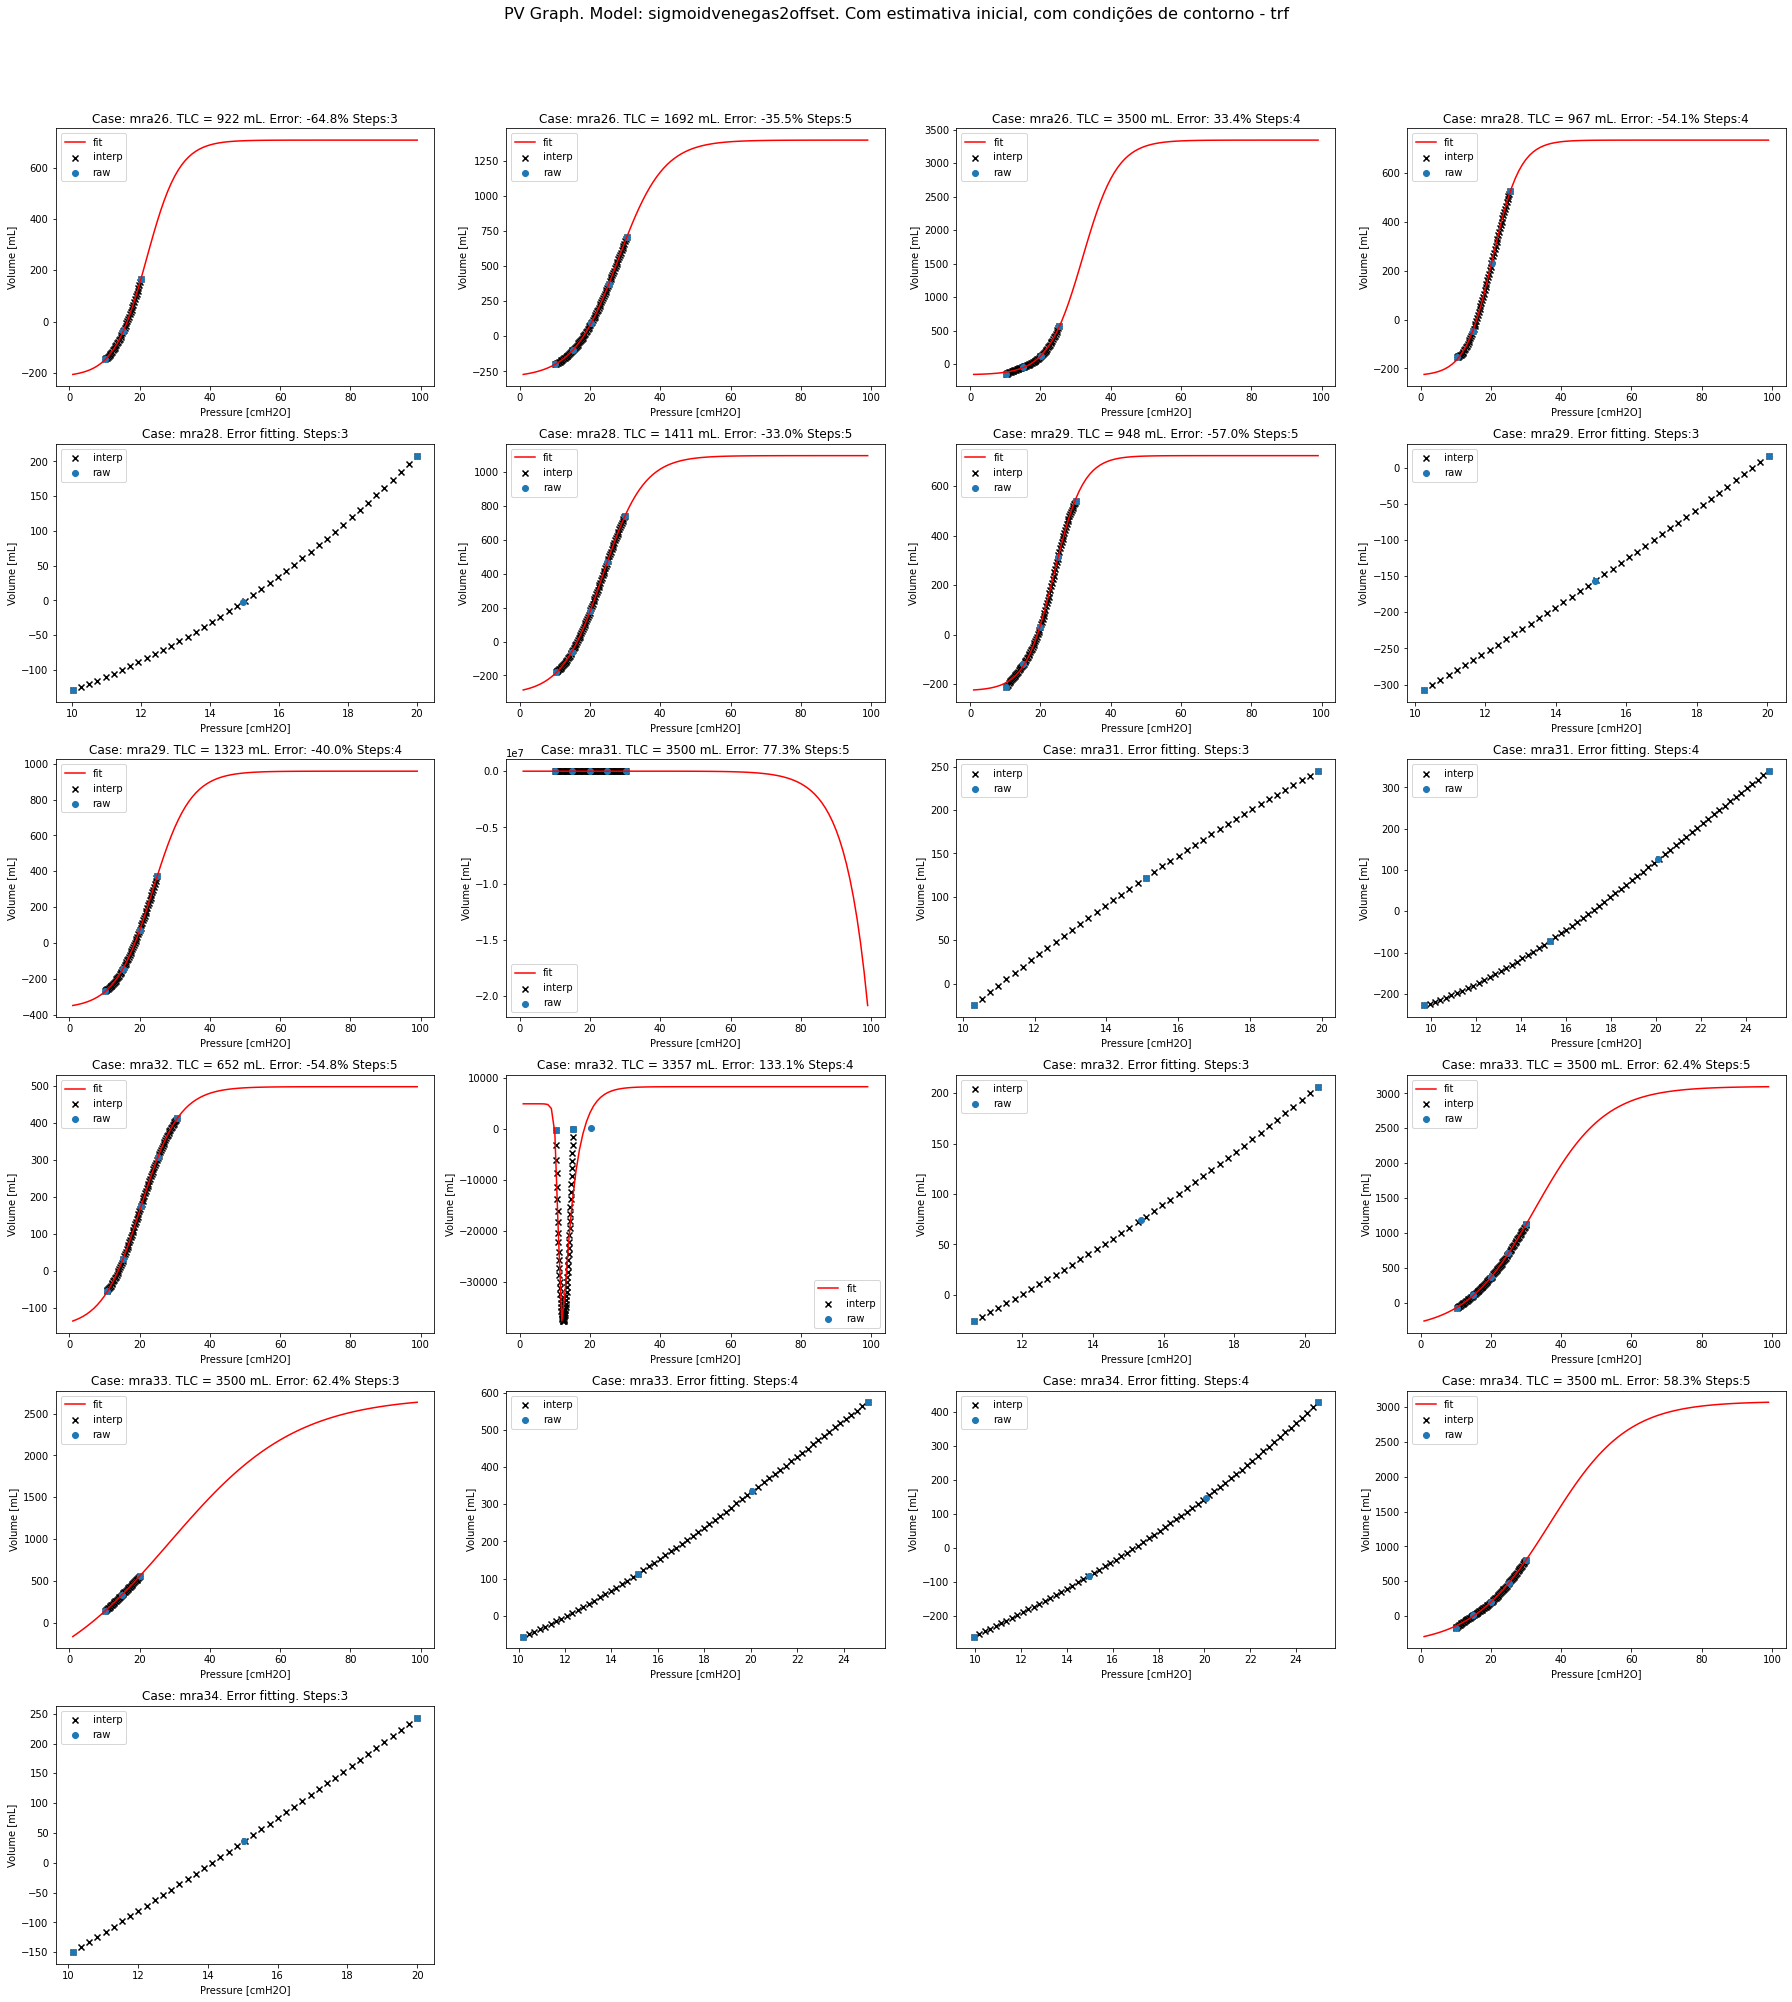

Norma(erro): 230.9. Erro médio: 58.94%. Ajustados: 13.


In [26]:
modelo = m.sigmoidvenegas2offset
metodo = 'trf'
texto = 'Com estimativa inicial, com condições de contorno - trf'
TLC_index = 0
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =      [  2000,     0.01,    0.05,      10,       1,    -300]
meus_bounds = ([  Vmin,  -np.inf, -np.inf,       0, -np.inf,   -5000 ],
              [  Vmax,   np.inf,  np.inf,      40,  np.inf,    5000 ])
for i in interpolacoes:
    _, _, _, df_final = m.testa_modelo(dadosdf, modelo,meu_p0 = meu_p0, metodo=metodo, texto=texto, n_points_interp=i, TLC_index=TLC_index, df_final=df_final, meus_bounds = meus_bounds)
    df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

#### Modelo sigmoidmurphy - Com estimativa inicial, com condições de contorno.
#### Método trf

Testando caso 0: mra26: [ 1338.2  -319.1 17938.7  1859.8     8.9 ]
Testando caso 1: mra26: [ 3500.0  -452.6 100000.0  3761.3    -2.1 ]
Testando caso 2: mra26: [ 3499.8  -500.0  3550.3  7949.9    31.6 ]
Testando caso 3: mra28: [ 1617.8  -289.5 22816.9  1177.9     6.0 ]
Testando caso 4: mra28: [ 1445.2  -369.8 20633.6  2649.7     7.9 ]
Testando caso 5: mra28: [ 2872.4  -391.4 82597.4  2079.0    -7.0 ]
	Caso 6 (mra29) deu erro... Steps:5
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
Testando caso 9: mra31: [ 1350.8  -500.0 19650.3  4908.9     9.0 ]
Testando caso 10: mra31: [ 1004.7  -454.2 23540.4  1654.7    -8.7 ]
	Caso 11 (mra31) deu erro... Steps:4
Testando caso 12: mra32: [  790.4  -214.4  8477.6  1655.0    10.9 ]
Testando caso 13: mra32: [ 3499.6  -500.0 44581.9  5801.3    11.3 ]
Testando caso 14: mra32: [  644.0  -500.0  2729.8 10928.8    29.6 ]
Testando caso 15: mra33: [ 3500.0  -500.0 67655.6  6027.9     5.4 ]
Testando caso 16: mra33: [ 1048.2  -318.4  45

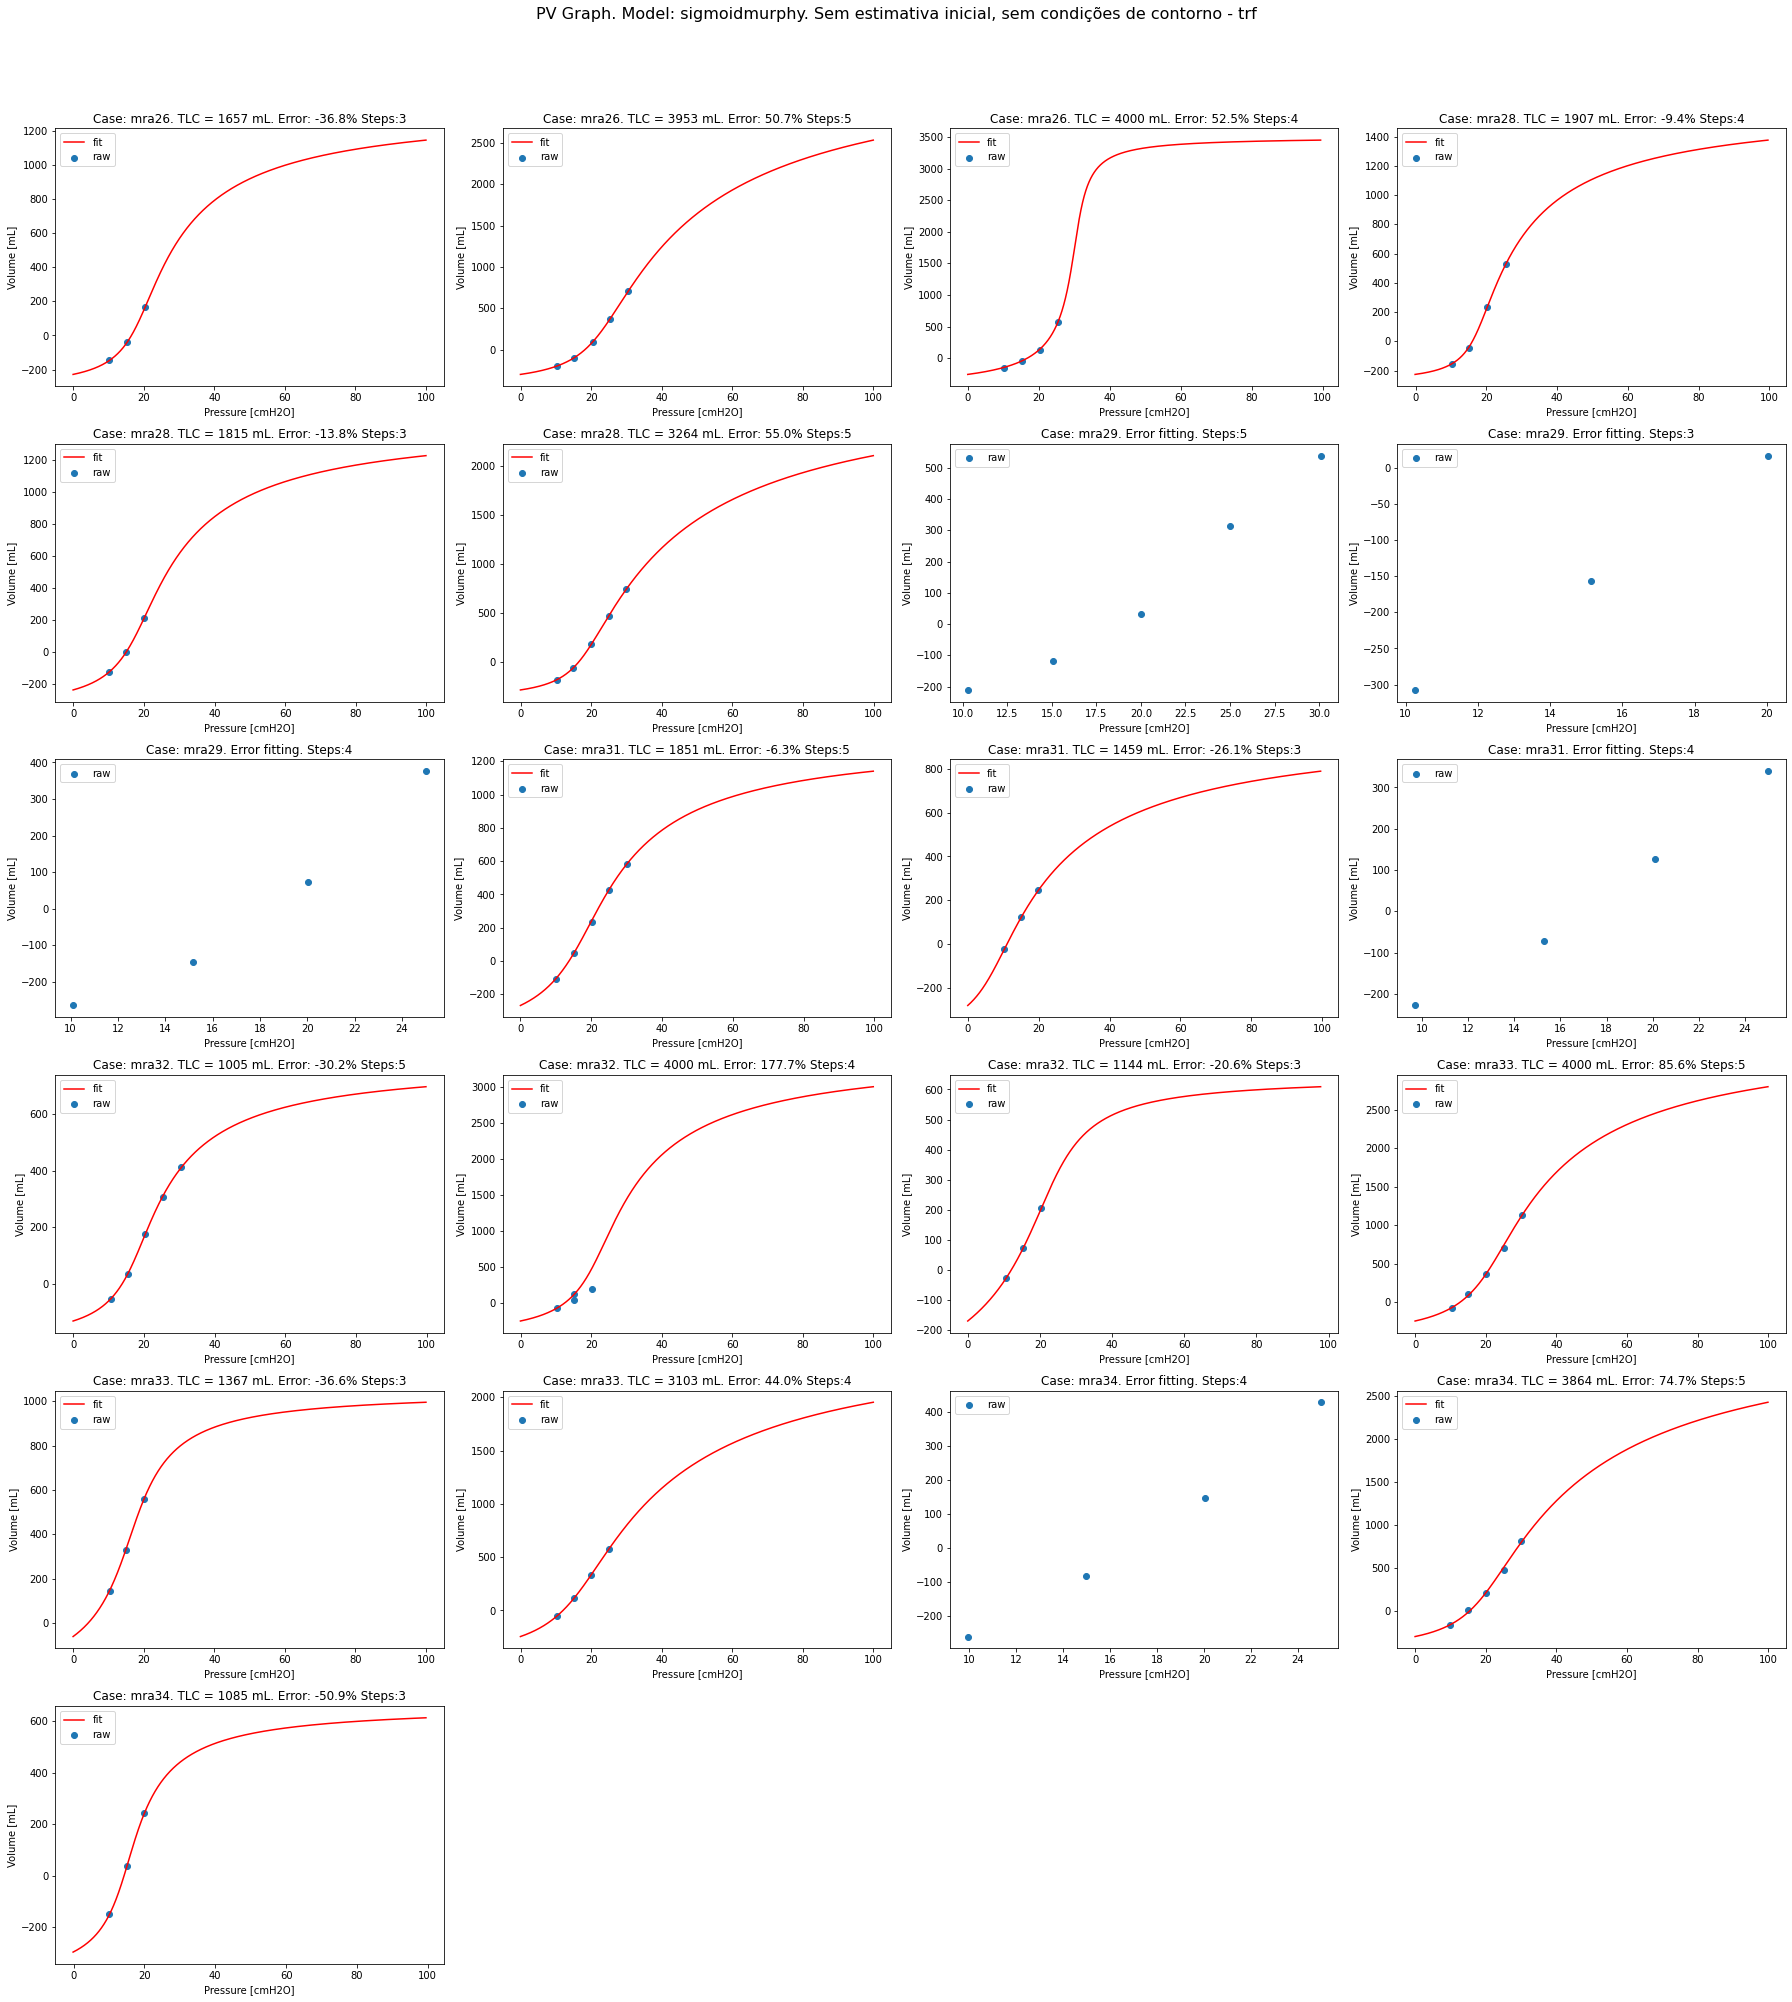

Norma(erro): 249.8. Erro médio: 48.19%. Ajustados: 16.
Testando caso 0: mra26: [ 2661.8  -277.9 100000.0  1062.9   -17.3 ]
Testando caso 1: mra26: [ 3486.8  -455.6 100000.0  3781.2    -2.2 ]
Testando caso 2: mra26: [ 3500.0  -475.7   100.0  7702.9    32.7 ]
Testando caso 3: mra28: [ 2803.8  -224.5 100000.0   378.9   -17.9 ]
	Caso 4 (mra28) deu erro... Steps:3
Testando caso 5: mra28: [ 3100.3  -389.4 100000.0  1951.5   -10.8 ]
	Caso 6 (mra29) deu erro... Steps:5
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
Testando caso 9: mra31: [ 1433.6  -500.0 22354.1  5076.3     8.2 ]
Testando caso 10: mra31: [ 1251.2  -500.0 42075.4  1003.9   -20.6 ]
Testando caso 11: mra31: [ 1047.9  -204.9 22536.7   100.0    -4.9 ]
Testando caso 12: mra32: [  881.2  -185.5 12469.8  1101.7     5.8 ]
Testando caso 13: mra32: [  546.2  -500.0  3380.4  3228.6    12.4 ]
	Caso 14 (mra32) deu erro... Steps:3
Testando caso 15: mra33: [ 3500.0  -500.0 68714.2  6321.2     5.4 ]
Testando caso 16: 

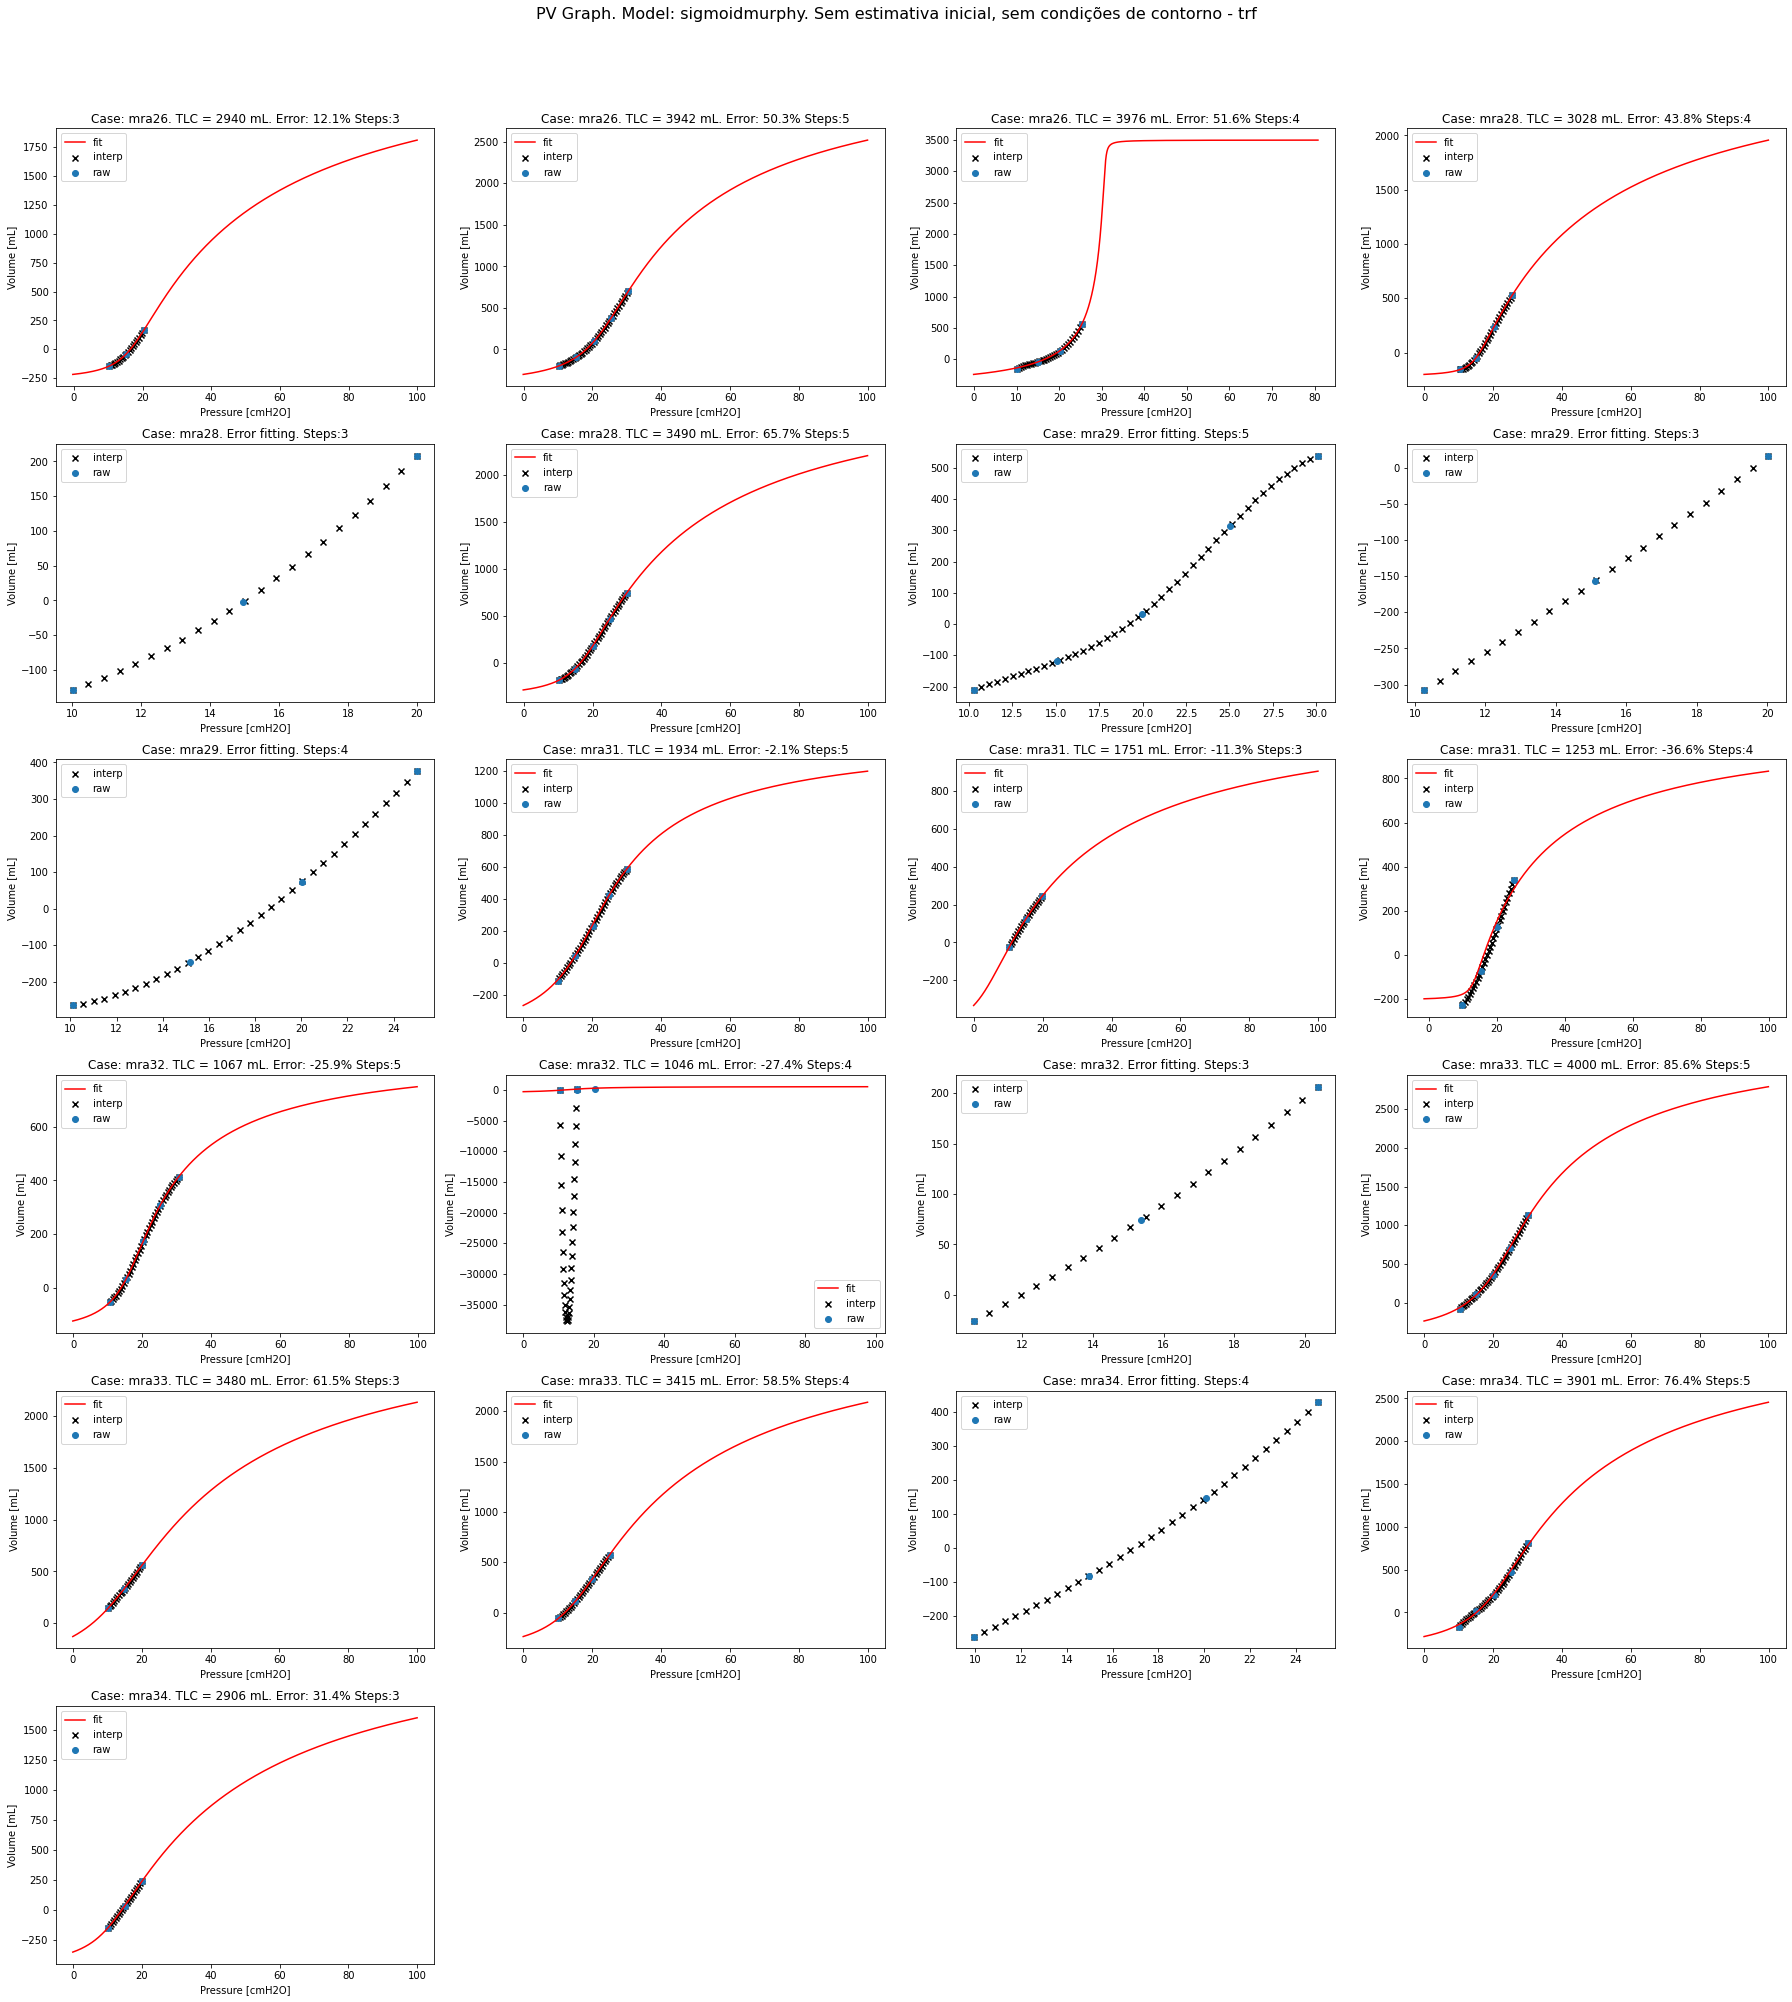

Norma(erro): 189.3. Erro médio: 42.68%. Ajustados: 15.
Testando caso 0: mra26: [ 2662.2  -279.0 100000.0  1073.7   -17.2 ]
Testando caso 1: mra26: [ 3486.9  -456.1 100000.0  3790.4    -2.2 ]
Testando caso 2: mra26: [ 3500.0  -468.5   100.0  7512.8    32.6 ]
Testando caso 3: mra28: [ 2809.4  -227.9 100000.0   397.6   -17.8 ]
	Caso 4 (mra28) deu erro... Steps:3
Testando caso 5: mra28: [ 3104.4  -392.7 100000.0  1990.3   -10.7 ]
Testando caso 6: mra29: [ 1456.5  -198.3 31380.3   100.0    -3.0 ]
	Caso 7 (mra29) deu erro... Steps:3
	Caso 8 (mra29) deu erro... Steps:4
Testando caso 9: mra31: [ 1443.3  -500.0 22719.4  5082.8     8.1 ]
Testando caso 10: mra31: [ 1251.3  -500.0 42073.5  1007.5   -20.5 ]
Testando caso 11: mra31: [ 1378.4  -201.1 42489.1   100.0   -14.1 ]
Testando caso 12: mra32: [  882.0  -188.0 12466.9  1129.4     5.8 ]
Testando caso 13: mra32: [ 2844.6   -91.1  9055.4   100.0    12.3 ]
	Caso 14 (mra32) deu erro... Steps:3
Testando caso 15: mra33: [ 3500.0  -500.0 68738.8  6341

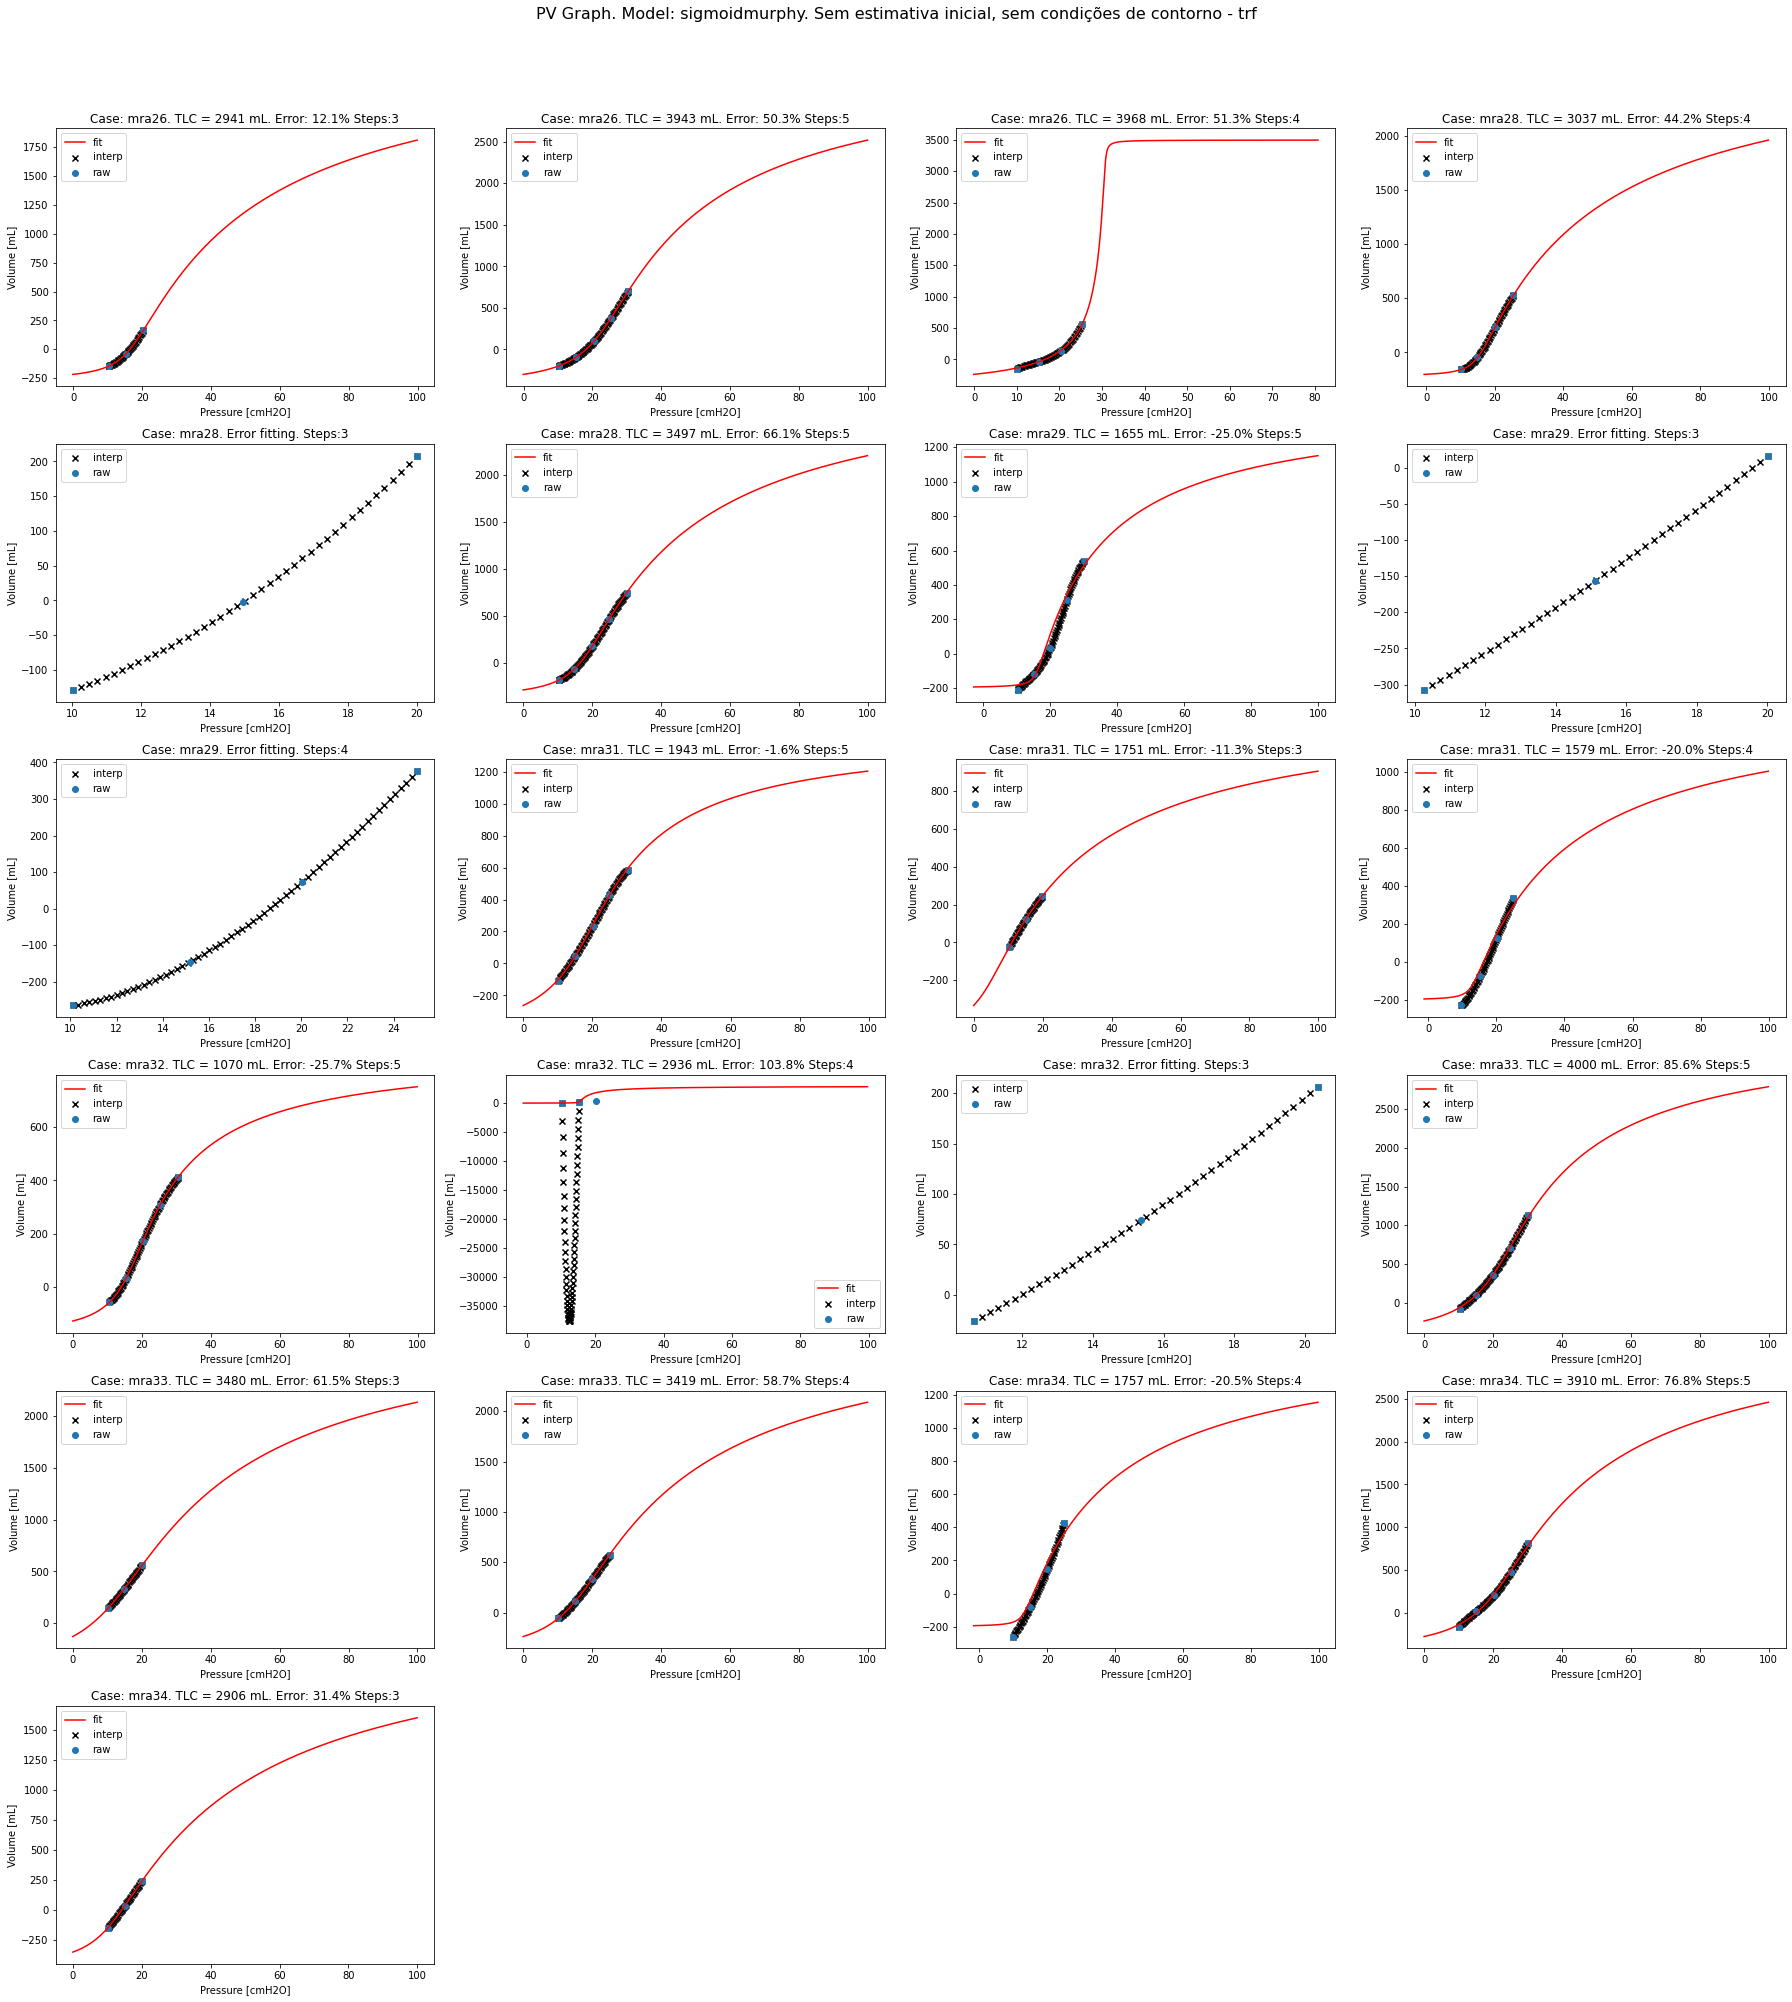

Norma(erro): 214.7. Erro médio: 43.88%. Ajustados: 17.


In [27]:
modelo = m.sigmoidmurphy
metodo = 'trf'
texto = 'Sem estimativa inicial, sem condições de contorno - trf'
TLC_index = 0
invert_PV = True
dadosdf["Modelo"] = ""
dadosdf["Metodo"] = ""
dadosdf["Ajustado"] = ""
dadosdf["Erro"] = ""
meu_p0 =  [ 2000.0,  -200.0,  1000.0,  1000.0,    20.0]
meus_bounds = ([    500,    -500,     100,     100,    -100],
              [   3500,       0,  100000,  100000,     100])
for i in interpolacoes:
    _, _, _, df_final = m.testa_modelo(dadosdf, modelo, metodo=metodo, texto=texto, n_points_interp=i, TLC_index=TLC_index, invert_PV=invert_PV, df_final=df_final, meu_p0 = meu_p0, meus_bounds = meus_bounds)
    df_resultados = pd.concat([df_resultados, dadosdf], ignore_index=True)

In [28]:
df_final

modelo metodo  norma_do_erro  erro_medio ajustados  \
0         sigmoidvenegas1    trf     204.241108   42.186811        20   
1         sigmoidvenegas1    trf     213.989464   43.876967        21   
2         sigmoidvenegas1    trf     213.923313   43.864824        21   
3      sigmoidpaivaoffset    trf     212.477891   44.256380        21   
4      sigmoidpaivaoffset    trf     213.981221   43.875619        21   
5      sigmoidpaivaoffset    trf     213.915116   43.863584        21   
6   sigmoidvenegas2offset    trf     173.322293   36.487375        19   
7   sigmoidvenegas2offset    trf     192.713835   53.741048        12   
8   sigmoidvenegas2offset    trf     230.945872   58.939582        13   
9           sigmoidmurphy    trf     249.830143   48.189418        16   
10          sigmoidmurphy    trf     189.300834   42.680738        15   
11          sigmoidmurphy    trf     214.708106   43.884461        17   

   n_pontos_interpolacao  
0                      0  
1                     10  
2                     20  
3                      0  
4                     10  
5                     20  
6                      0  
7                     10  
8                     20  
9                      0  
10                    10  
11                    20

In [31]:
df_modelo_por_ajustados = df_final.groupby('modelo', as_index=False)[['ajustados']].sum()
df_modelo_por_ajustados

modelo  ajustados
0          sigmoidmurphy         48
1     sigmoidpaivaoffset         63
2        sigmoidvenegas1         62
3  sigmoidvenegas2offset         44

Text(0.5, 0.98, 'Quantidade de Ajustados por Modelo')

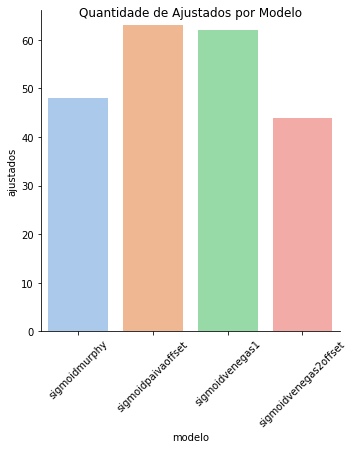

In [33]:
modelosxajustados = sns.catplot(x="modelo", y="ajustados", kind="bar", palette="pastel", data=df_modelo_por_ajustados)
modelosxajustados.set_xticklabels(rotation=45).fig.suptitle('Quantidade de Ajustados por Modelo')




Text(0.5, 0.98, 'Erro medio por Modelo')

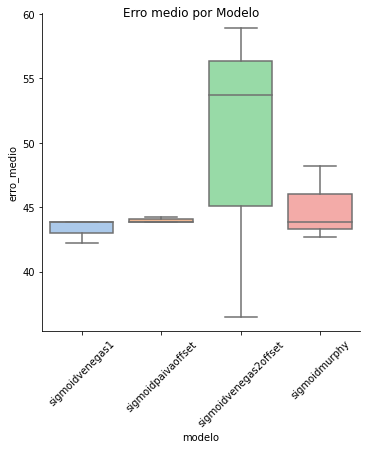

In [83]:
modelosxerro = sns.catplot(x="modelo", y="erro_medio", kind="box", palette="pastel", data=df_final)
modelosxerro.set_xticklabels(rotation=45).fig.suptitle('Erro medio por Modelo')


In [36]:
df_modelo_por_ajustados = df_final.groupby('modelo', as_index=False)[['erro_medio']].median()
df_modelo_por_ajustados

modelo  erro_medio
0          sigmoidmurphy   43.884461
1     sigmoidpaivaoffset   43.875619
2        sigmoidvenegas1   43.864824
3  sigmoidvenegas2offset   53.741048

#### sigmoidvenegas1 - gráfico por step


In [37]:
sigmoidvenegas1_df = df_resultados.loc[df_resultados['Modelo'] == 'sigmoidvenegas1'].loc[df_resultados['Ajustado'] == True]
sigmoidvenegas1_df

Animal Manobra                                              Dados n_steps  \
0   mra26       B  [[10.25, -145.76797485351562], [20.61562538146...       3   
1   mra26       D  [[10.178125381469727, -197.8517303466797], [20...       5   
2   mra26       C  [[10.131250381469727, -147.3227081298828], [20...       4   
3   mra28       C  [[10.287500381469727, -152.2864532470703], [20...       4   
4   mra28       B  [[10.021874904632568, -128.87612915039062], [2...       3   
..    ...     ...                                                ...     ...   
58  mra33       B  [[10.303646087646484, 146.587890625], [20.1421...       3   
59  mra33       C  [[10.202864646911621, -56.06181335449219], [20...       4   
60  mra34       C  [[9.928905963897705, -259.58831787109375], [20...       4   
61  mra34       D  [[9.9609375, -167.6243133544922], [20.25208377...       5   
62  mra34       B  [[10.135156631469727, -149.72845458984375], [2...       3   

                                             Pressoes  \
0                 [10.25, 15.334375381469727, 20.375]   
1   [10.178125381469727, 15.212499618530273, 20.42...   
2   [10.131250381469727, 15.112500190734863, 20.27...   
3   [10.287500381469727, 14.931250095367432, 20.21...   
4   [10.021874904632568, 14.962499618530273, 20.01...   
..                                                ...   
58  [10.303646087646484, 14.871094226837158, 20.07...   
59  [10.202864646911621, 15.145573139190674, 20.05...   
60  [9.928905963897705, 14.968489646911621, 20.058...   
61  [9.9609375, 15.040364742279053, 20.13463592529...   
62  [10.135156631469727, 15.052343845367432, 20.00...   

                                              Volumes  volume_esperado  \
0   [-145.76797485351562, -37.26432800292969, 166....           2622.9   
1   [-197.8517303466797, -95.13343811035156, 97.13...           2622.9   
2   [-147.3227081298828, -36.04450607299805, 131.8...           2622.9   
3   [-152.2864532470703, -45.45492172241211, 234.1...           2105.9   
4   [-128.87612915039062, -2.0903725624084473, 208...           2105.9   
..                                                ...              ...   
58  [146.587890625, 330.3841552734375, 560.5339355...           2154.6   
59  [-56.06181335449219, 113.50151824951172, 334.8...           2154.6   
60  [-259.58831787109375, -81.21270751953125, 147....           2211.2   
61  [-167.6243133544922, 13.06080150604248, 203.19...           2211.2   
62  [-149.72845458984375, 36.645347595214844, 243....           2211.2   

             Modelo Metodo Ajustado     Erro n_pontos_interpolacao  
0   sigmoidvenegas1    trf     True -26.1649                     0  
1   sigmoidvenegas1    trf     True -35.3537                     0  
2   sigmoidvenegas1    trf     True  33.4401                     0  
3   sigmoidvenegas1    trf     True -56.2664                     0  
4   sigmoidvenegas1    trf     True -7.13868                     0  
..              ...    ...      ...      ...                   ...  
58  sigmoidvenegas1    trf     True  3.38509                    20  
59  sigmoidvenegas1    trf     True -32.8743                    20  
60  sigmoidvenegas1    trf     True -16.1415                    20  
61  sigmoidvenegas1    trf     True  58.2851                    20  
62  sigmoidvenegas1    trf     True -41.9109                    20  

[62 rows x 12 columns]

Animal  Manobra  Dados  n_steps  Pressoes  Volumes  \
n_pontos_interpolacao                                                       
0                          20       20     20       20        20       20   
10                         21       21     21       21        21       21   
20                         21       21     21       21        21       21   

                       volume_esperado  Modelo  Metodo  Ajustado  Erro  
n_pontos_interpolacao                                                   
0                                   20      20      20        20    20  
10                                  21      21      21        21    21  
20                                  21      21      21        21    21

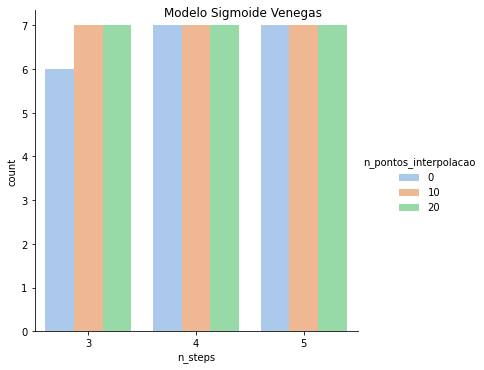

In [39]:
stepsxajustados = sns.catplot(x="n_steps", kind="count", hue="n_pontos_interpolacao",
            palette="pastel", data=sigmoidvenegas1_df).fig.suptitle('Modelo Sigmoide Venegas')



sigmoidvenegas1_df.groupby('n_pontos_interpolacao').count()


In [68]:
errovenegas1_df=df_final.loc[df_final['modelo'] == 'sigmoidvenegas1'].groupby('n_pontos_interpolacao', as_index=False)[['erro_medio']].median()
errovenegas1_df

n_pontos_interpolacao  erro_medio
0                      0   42.186811
1                     10   43.876967
2                     20   43.864824

Text(0.5, 0.98, 'Erro medio por Pontos interpolados')

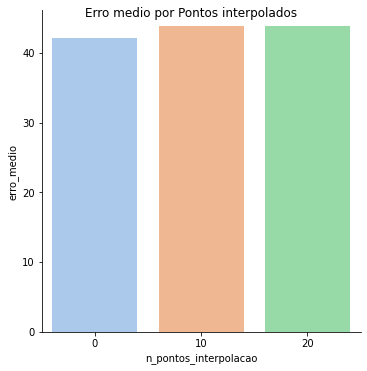

In [69]:
modelosxerro = sns.catplot(x="n_pontos_interpolacao", y="erro_medio", kind="bar", palette="pastel", data=errovenegas1_df)
modelosxerro.fig.suptitle('Erro medio por Pontos interpolados')


#### sigmoidpaivaoffset - gráfico por step

In [45]:
sigmoidpaivaoffset_df = df_resultados.loc[df_resultados['Modelo'] == 'sigmoidpaivaoffset'].loc[df_resultados['Ajustado'] == True]
sigmoidpaivaoffset_df.head(5)

Animal Manobra                                              Dados n_steps  \
63  mra26       B  [[10.25, -145.76797485351562], [20.61562538146...       3   
64  mra26       D  [[10.178125381469727, -197.8517303466797], [20...       5   
65  mra26       C  [[10.131250381469727, -147.3227081298828], [20...       4   
66  mra28       C  [[10.287500381469727, -152.2864532470703], [20...       4   
67  mra28       B  [[10.021874904632568, -128.87612915039062], [2...       3   

                                             Pressoes  \
63                [10.25, 15.334375381469727, 20.375]   
64  [10.178125381469727, 15.212499618530273, 20.42...   
65  [10.131250381469727, 15.112500190734863, 20.27...   
66  [10.287500381469727, 14.931250095367432, 20.21...   
67  [10.021874904632568, 14.962499618530273, 20.01...   

                                              Volumes  volume_esperado  \
63  [-145.76797485351562, -37.26432800292969, 166....           2622.9   
64  [-197.8517303466797, -95.13343811035156, 97.13...           2622.9   
65  [-147.3227081298828, -36.04450607299805, 131.8...           2622.9   
66  [-152.2864532470703, -45.45492172241211, 234.1...           2105.9   
67  [-128.87612915039062, -2.0903725624084473, 208...           2105.9   

                Modelo Metodo Ajustado     Erro n_pontos_interpolacao  
63  sigmoidpaivaoffset    trf     True  33.4401                     0  
64  sigmoidpaivaoffset    trf     True -35.3537                     0  
65  sigmoidpaivaoffset    trf     True  33.4401                     0  
66  sigmoidpaivaoffset    trf     True -56.2664                     0  
67  sigmoidpaivaoffset    trf     True   41.422                     0

Animal  Manobra  Dados  n_steps  Pressoes  Volumes  \
n_pontos_interpolacao                                                       
0                          21       21     21       21        21       21   
10                         21       21     21       21        21       21   
20                         21       21     21       21        21       21   

                       volume_esperado  Modelo  Metodo  Ajustado  Erro  
n_pontos_interpolacao                                                   
0                                   21      21      21        21    21  
10                                  21      21      21        21    21  
20                                  21      21      21        21    21

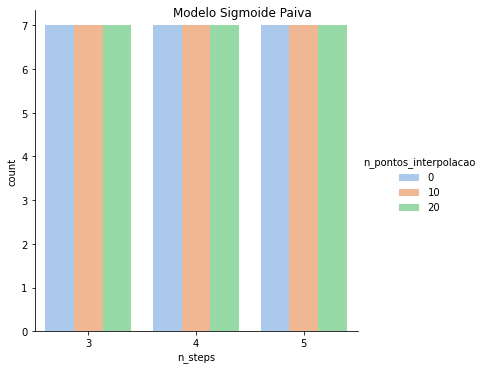

In [46]:
stepsxajustados_1 = sns.catplot(x="n_steps", kind="count", hue="n_pontos_interpolacao",
            palette="pastel", data=sigmoidpaivaoffset_df).fig.suptitle('Modelo Sigmoide Paiva')

sigmoidpaivaoffset_df.groupby('n_pontos_interpolacao').count()


In [70]:
erropaiva_df=df_final.loc[df_final['modelo'] == 'sigmoidpaivaoffset'].groupby('n_pontos_interpolacao', as_index=False)[['erro_medio']].median()
erropaiva_df

n_pontos_interpolacao  erro_medio
0                      0   44.256380
1                     10   43.875619
2                     20   43.863584

Text(0.5, 0.98, 'Erro medio por Pontos interpolados')

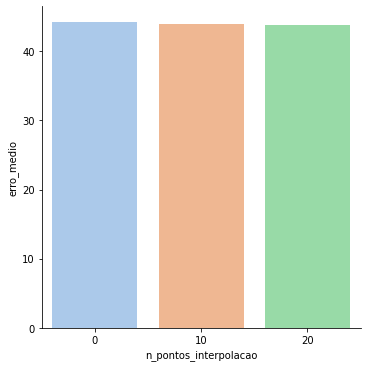

In [71]:
modelosxerro_1 = sns.catplot(x="n_pontos_interpolacao", y="erro_medio", kind="bar", palette="pastel", data=erropaiva_df)
modelosxerro.fig.suptitle('Erro medio por Pontos interpolados')

#### sigmoidvenegas2offset - gráfico por step

In [72]:
sigmoidvenegas2offset_df = df_resultados.loc[df_resultados['Modelo'] == 'sigmoidvenegas2offset'].loc[df_resultados['Ajustado'] == True]
sigmoidvenegas2offset_df.head(5)

Animal Manobra                                              Dados n_steps  \
126  mra26       B  [[10.25, -145.76797485351562], [20.61562538146...       3   
127  mra26       D  [[10.178125381469727, -197.8517303466797], [20...       5   
128  mra26       C  [[10.131250381469727, -147.3227081298828], [20...       4   
129  mra28       C  [[10.287500381469727, -152.2864532470703], [20...       4   
130  mra28       B  [[10.021874904632568, -128.87612915039062], [2...       3   

                                              Pressoes  \
126                [10.25, 15.334375381469727, 20.375]   
127  [10.178125381469727, 15.212499618530273, 20.42...   
128  [10.131250381469727, 15.112500190734863, 20.27...   
129  [10.287500381469727, 14.931250095367432, 20.21...   
130  [10.021874904632568, 14.962499618530273, 20.01...   

                                               Volumes  volume_esperado  \
126  [-145.76797485351562, -37.26432800292969, 166....           2622.9   
127  [-197.8517303466797, -95.13343811035156, 97.13...           2622.9   
128  [-147.3227081298828, -36.04450607299805, 131.8...           2622.9   
129  [-152.2864532470703, -45.45492172241211, 234.1...           2105.9   
130  [-128.87612915039062, -2.0903725624084473, 208...           2105.9   

                    Modelo Metodo Ajustado     Erro n_pontos_interpolacao  
126  sigmoidvenegas2offset    trf     True -30.5944                     0  
127  sigmoidvenegas2offset    trf     True -35.3537                     0  
128  sigmoidvenegas2offset    trf     True  33.4401                     0  
129  sigmoidvenegas2offset    trf     True -56.2664                     0  
130  sigmoidvenegas2offset    trf     True -20.8398                     0

Animal  Manobra  Dados  n_steps  Pressoes  Volumes  \
n_pontos_interpolacao                                                       
0                          19       19     19       19        19       19   
10                         12       12     12       12        12       12   
20                         13       13     13       13        13       13   

                       volume_esperado  Modelo  Metodo  Ajustado  Erro  
n_pontos_interpolacao                                                   
0                                   19      19      19        19    19  
10                                  12      12      12        12    12  
20                                  13      13      13        13    13

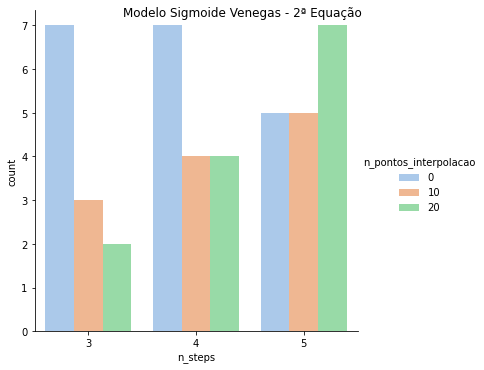

In [73]:
stepsxajustados_2 = sns.catplot(x="n_steps", kind="count", hue="n_pontos_interpolacao",
            palette="pastel", data=sigmoidvenegas2offset_df).fig.suptitle('Modelo Sigmoide Venegas - 2ª Equação')

sigmoidvenegas2offset_df.groupby('n_pontos_interpolacao').count()


In [74]:
errovenegas2_df=df_final.loc[df_final['modelo'] == 'sigmoidvenegas2offset'].groupby('n_pontos_interpolacao', as_index=False)[['erro_medio']].median()
errovenegas2_df

n_pontos_interpolacao  erro_medio
0                      0   36.487375
1                     10   53.741048
2                     20   58.939582

Text(0.5, 0.98, 'Erro medio por Pontos interpolados')

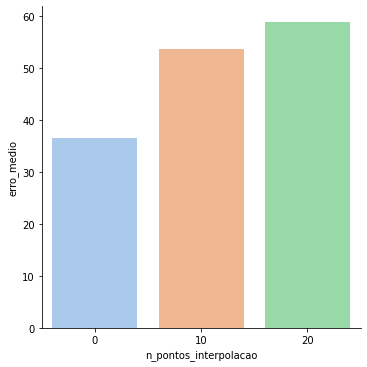

In [75]:
modelosxerro_2 = sns.catplot(x="n_pontos_interpolacao", y="erro_medio", kind="bar", palette="pastel", data=errovenegas2_df)
modelosxerro.fig.suptitle('Erro medio por Pontos interpolados')

#### sigmoidmurphy - gráfico por step

In [76]:
sigmoidmurphy_df = df_resultados.loc[df_resultados['Modelo'] == 'sigmoidmurphy'].loc[df_resultados['Ajustado'] == True]
sigmoidmurphy_df.head(5)

Animal Manobra                                              Dados n_steps  \
189  mra26       B  [[10.25, -145.76797485351562], [20.61562538146...       3   
190  mra26       D  [[10.178125381469727, -197.8517303466797], [20...       5   
191  mra26       C  [[10.131250381469727, -147.3227081298828], [20...       4   
192  mra28       C  [[10.287500381469727, -152.2864532470703], [20...       4   
193  mra28       B  [[10.021874904632568, -128.87612915039062], [2...       3   

                                              Pressoes  \
189                [10.25, 15.334375381469727, 20.375]   
190  [10.178125381469727, 15.212499618530273, 20.42...   
191  [10.131250381469727, 15.112500190734863, 20.27...   
192  [10.287500381469727, 14.931250095367432, 20.21...   
193  [10.021874904632568, 14.962499618530273, 20.01...   

                                               Volumes  volume_esperado  \
189  [-145.76797485351562, -37.26432800292969, 166....           2622.9   
190  [-197.8517303466797, -95.13343811035156, 97.13...           2622.9   
191  [-147.3227081298828, -36.04450607299805, 131.8...           2622.9   
192  [-152.2864532470703, -45.45492172241211, 234.1...           2105.9   
193  [-128.87612915039062, -2.0903725624084473, 208...           2105.9   

            Modelo Metodo Ajustado     Erro n_pontos_interpolacao  
189  sigmoidmurphy    trf     True  -36.814                     0  
190  sigmoidmurphy    trf     True   50.697                     0  
191  sigmoidmurphy    trf     True  52.4954                     0  
192  sigmoidmurphy    trf     True -9.42601                     0  
193  sigmoidmurphy    trf     True -13.8139                     0

Animal  Manobra  Dados  n_steps  Pressoes  Volumes  \
n_pontos_interpolacao                                                       
0                          16       16     16       16        16       16   
10                         15       15     15       15        15       15   
20                         17       17     17       17        17       17   

                       volume_esperado  Modelo  Metodo  Ajustado  Erro  
n_pontos_interpolacao                                                   
0                                   16      16      16        16    16  
10                                  15      15      15        15    15  
20                                  17      17      17        17    17

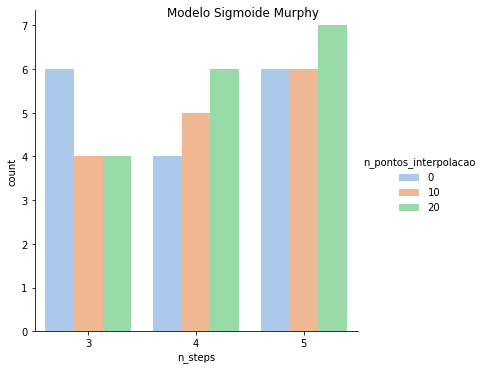

In [77]:
stepsxajustados_3 = sns.catplot(x="n_steps", kind="count", hue="n_pontos_interpolacao",
            palette="pastel", data=sigmoidmurphy_df).fig.suptitle('Modelo Sigmoide Murphy')

sigmoidmurphy_df.groupby('n_pontos_interpolacao').count()

In [78]:
erromurphy_df=df_final.loc[df_final['modelo'] == 'sigmoidmurphy'].groupby('n_pontos_interpolacao', as_index=False)[['erro_medio']].median()
erromurphy_df

n_pontos_interpolacao  erro_medio
0                      0   48.189418
1                     10   42.680738
2                     20   43.884461

Text(0.5, 0.98, 'Erro medio por Pontos interpolados')

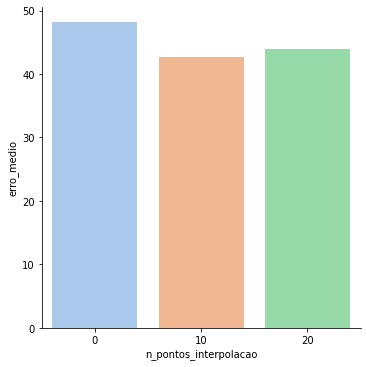

In [98]:
modelosxerro_3 = sns.catplot(x="n_pontos_interpolacao", y="erro_medio", kind="bar", palette="pastel", data=erromurphy_df)
modelosxerro.fig.suptitle('Erro medio por Pontos interpolados')

## Fase 3 - Resultados

In [86]:
df_final

modelo metodo  norma_do_erro  erro_medio ajustados  \
0         sigmoidvenegas1    trf     204.241108   42.186811        20   
1         sigmoidvenegas1    trf     213.989464   43.876967        21   
2         sigmoidvenegas1    trf     213.923313   43.864824        21   
3      sigmoidpaivaoffset    trf     212.477891   44.256380        21   
4      sigmoidpaivaoffset    trf     213.981221   43.875619        21   
5      sigmoidpaivaoffset    trf     213.915116   43.863584        21   
6   sigmoidvenegas2offset    trf     173.322293   36.487375        19   
7   sigmoidvenegas2offset    trf     192.713835   53.741048        12   
8   sigmoidvenegas2offset    trf     230.945872   58.939582        13   
9           sigmoidmurphy    trf     249.830143   48.189418        16   
10          sigmoidmurphy    trf     189.300834   42.680738        15   
11          sigmoidmurphy    trf     214.708106   43.884461        17   

   n_pontos_interpolacao  
0                      0  
1                     10  
2                     20  
3                      0  
4                     10  
5                     20  
6                      0  
7                     10  
8                     20  
9                      0  
10                    10  
11                    20

In [91]:
modelos10interpol_df=df_final.loc[df_final['n_pontos_interpolacao'] == 10].groupby('modelo', as_index=False)[['ajustados']].sum()
modelos10interpol_df

modelo  ajustados
0          sigmoidmurphy         15
1     sigmoidpaivaoffset         21
2        sigmoidvenegas1         21
3  sigmoidvenegas2offset         12

Text(0.5, 0.98, 'Quantidade de Ajustados por Modelo - 10 pontos interpolados')

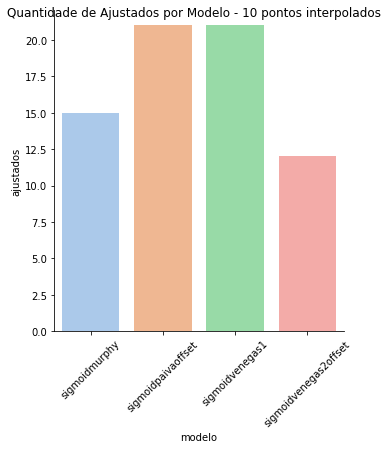

In [92]:
modelosxajustados10 = sns.catplot(x="modelo", y="ajustados", kind="bar", palette="pastel", data=modelos10interpol_df)
modelosxajustados10.set_xticklabels(rotation=45).fig.suptitle('Quantidade de Ajustados por Modelo - 10 pontos interpolados')


In [93]:
modelos10interpolerro_df=df_final.loc[df_final['n_pontos_interpolacao'] == 10].groupby('modelo', as_index=False)[['erro_medio']].median()
modelos10interpolerro_df

modelo  erro_medio
0          sigmoidmurphy   42.680738
1     sigmoidpaivaoffset   43.875619
2        sigmoidvenegas1   43.876967
3  sigmoidvenegas2offset   53.741048

Text(0.5, 0.98, 'Erro medio por Modelo - 10 pontos interpolados')

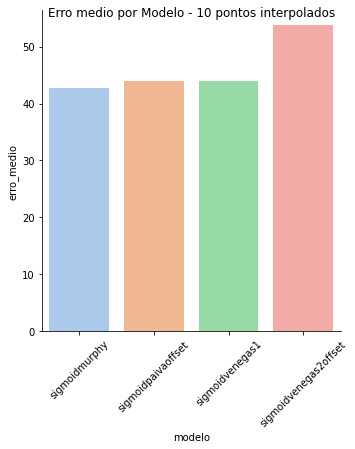

In [97]:
modelos10interpolerro = sns.catplot(x="modelo", y="erro_medio", kind="bar", palette="pastel", data=modelos10interpolerro_df)
modelos10interpolerro.set_xticklabels(rotation=45).fig.suptitle('Erro medio por Modelo - 10 pontos interpolados')


## Fase 4 - Resultados

In [99]:
df_resultados

Animal Manobra                                              Dados n_steps  \
0    mra26       B  [[10.25, -145.76797485351562], [20.61562538146...       3   
1    mra26       D  [[10.178125381469727, -197.8517303466797], [20...       5   
2    mra26       C  [[10.131250381469727, -147.3227081298828], [20...       4   
3    mra28       C  [[10.287500381469727, -152.2864532470703], [20...       4   
4    mra28       B  [[10.021874904632568, -128.87612915039062], [2...       3   
..     ...     ...                                                ...     ...   
247  mra33       B  [[10.303646087646484, 146.587890625], [20.1421...       3   
248  mra33       C  [[10.202864646911621, -56.06181335449219], [20...       4   
249  mra34       C  [[9.928905963897705, -259.58831787109375], [20...       4   
250  mra34       D  [[9.9609375, -167.6243133544922], [20.25208377...       5   
251  mra34       B  [[10.135156631469727, -149.72845458984375], [2...       3   

                                              Pressoes  \
0                  [10.25, 15.334375381469727, 20.375]   
1    [10.178125381469727, 15.212499618530273, 20.42...   
2    [10.131250381469727, 15.112500190734863, 20.27...   
3    [10.287500381469727, 14.931250095367432, 20.21...   
4    [10.021874904632568, 14.962499618530273, 20.01...   
..                                                 ...   
247  [10.303646087646484, 14.871094226837158, 20.07...   
248  [10.202864646911621, 15.145573139190674, 20.05...   
249  [9.928905963897705, 14.968489646911621, 20.058...   
250  [9.9609375, 15.040364742279053, 20.13463592529...   
251  [10.135156631469727, 15.052343845367432, 20.00...   

                                               Volumes  volume_esperado  \
0    [-145.76797485351562, -37.26432800292969, 166....           2622.9   
1    [-197.8517303466797, -95.13343811035156, 97.13...           2622.9   
2    [-147.3227081298828, -36.04450607299805, 131.8...           2622.9   
3    [-152.2864532470703, -45.45492172241211, 234.1...           2105.9   
4    [-128.87612915039062, -2.0903725624084473, 208...           2105.9   
..                                                 ...              ...   
247  [146.587890625, 330.3841552734375, 560.5339355...           2154.6   
248  [-56.06181335449219, 113.50151824951172, 334.8...           2154.6   
249  [-259.58831787109375, -81.21270751953125, 147....           2211.2   
250  [-167.6243133544922, 13.06080150604248, 203.19...           2211.2   
251  [-149.72845458984375, 36.645347595214844, 243....           2211.2   

              Modelo Metodo Ajustado     Erro n_pontos_interpolacao  
0    sigmoidvenegas1    trf     True -26.1649                     0  
1    sigmoidvenegas1    trf     True -35.3537                     0  
2    sigmoidvenegas1    trf     True  33.4401                     0  
3    sigmoidvenegas1    trf     True -56.2664                     0  
4    sigmoidvenegas1    trf     True -7.13868                     0  
..               ...    ...      ...      ...                   ...  
247    sigmoidmurphy    trf     True  61.4997                    20  
248    sigmoidmurphy    trf     True  58.6867                    20  
249    sigmoidmurphy    trf     True -20.5381                    20  
250    sigmoidmurphy    trf     True  76.8102                    20  
251    sigmoidmurphy    trf     True  31.4004                    20  

[252 rows x 12 columns]

In [159]:
ajustadosxanimal_df=df_resultados.loc[df_resultados['n_pontos_interpolacao'] == 10].loc[df_resultados['Ajustado'] == True].loc[df_resultados['Modelo']=='sigmoidvenegas1'].groupby('Animal', as_index=False).agg({"Ajustado": "sum"})

Text(0.5, 0.98, 'Quantidade de ajustados por animal - sigmoidvenegas1')

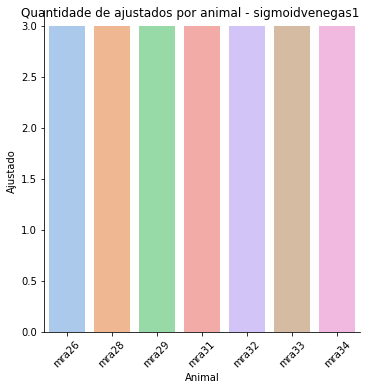

In [161]:
ajustadosxanimal = sns.catplot(x="Animal", y="Ajustado", kind="bar", palette="pastel", data=ajustadosxanimal_df)
ajustadosxanimal.set_xticklabels(rotation=45).fig.suptitle('Quantidade de ajustados por animal - sigmoidvenegas1')

In [162]:
ajustadosxanimal_df2=df_resultados.loc[df_resultados['n_pontos_interpolacao'] == 10].loc[df_resultados['Ajustado'] == True].loc[df_resultados['Modelo']=='sigmoidpaivaoffset'].groupby('Animal', as_index=False).agg({"Ajustado": "sum"})

Text(0.5, 0.98, 'Quantidade de ajustados por animal - sigmoidpaivaoffset')

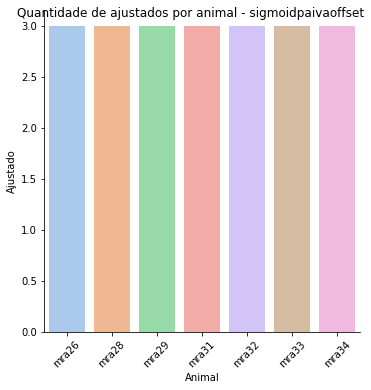

In [163]:
ajustadosxanimal2 = sns.catplot(x="Animal", y="Ajustado", kind="bar", palette="pastel", data=ajustadosxanimal_df2)
ajustadosxanimal2.set_xticklabels(rotation=45).fig.suptitle('Quantidade de ajustados por animal - sigmoidpaivaoffset')

In [164]:
ajustadosxanimal_df3=df_resultados.loc[df_resultados['n_pontos_interpolacao'] == 10].loc[df_resultados['Ajustado'] == True].loc[df_resultados['Modelo']=='sigmoidvenegas2offset'].groupby('Animal', as_index=False).agg({"Ajustado": "sum"})

Text(0.5, 0.98, 'Quantidade de ajustados por animal - sigmoidvenegas2offset')

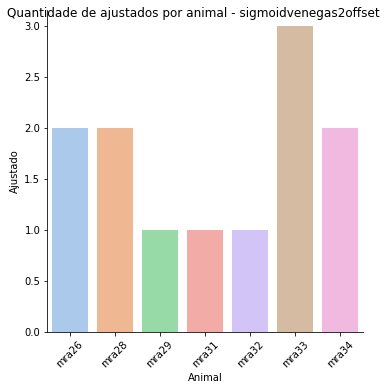

In [165]:
ajustadosxanimal3 = sns.catplot(x="Animal", y="Ajustado", kind="bar", palette="pastel", data=ajustadosxanimal_df3)
ajustadosxanimal3.set_xticklabels(rotation=45).fig.suptitle('Quantidade de ajustados por animal - sigmoidvenegas2offset')

In [166]:
ajustadosxanimal_df4=df_resultados.loc[df_resultados['n_pontos_interpolacao'] == 10].loc[df_resultados['Ajustado'] == True].loc[df_resultados['Modelo']=='sigmoidmurphy'].groupby('Animal', as_index=False).agg({"Ajustado": "sum"})

Text(0.5, 0.98, 'Quantidade de ajustados por animal - sigmoidmurphy')

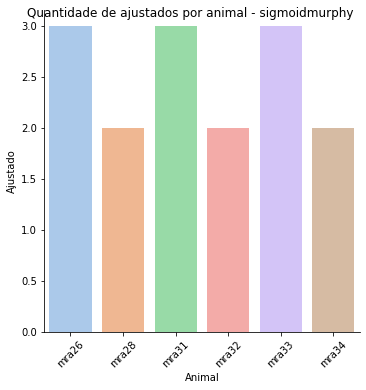

In [167]:
ajustadosxanimal4 = sns.catplot(x="Animal", y="Ajustado", kind="bar", palette="pastel", data=ajustadosxanimal_df4)
ajustadosxanimal4.set_xticklabels(rotation=45).fig.suptitle('Quantidade de ajustados por animal - sigmoidmurphy')